I propose to make an NLP pipeline that will ultimately classify legal testimony into topics.

Problem:
Unreliable speech from public officials and news networks have reached a head in our nation.  News outlets, law offices, researchers, as well as others have an innate desire to be able to easily find relevant information within current, past, and future cases on the fly (immediate basis).  The purpose is to allow cross-referencing multiple testimonies and other public speech for inconsistencies and inaccuracies over time.

Solution:
Collect testimony, commentary, etc. from a target witness or person over years in the past to feed into our classifier.  The neural network will make determinations of the validity of statements in near real-time.  As one can imagine, having such a tool at your disposal during an interview can be powerful in challenging testimony.  This could broaden out to public statements made over news networks, social media, etc. to combat the misinformation propagated as of late.  Not only could AI be an effective tool in ensuring the accountability of truth to supersede all else but, we could create a subscription service to which news outlets and other researchers subscribe to have access to the neural network classifier utilizing datasets collected.  Future upgrade the subscription service could use the large datasets to run personality analyses on anyone with a public social account.  The benefit of this could target human resource prospecting applicants in hiring, negotiations between individuals/companies/foreign leaders, as well as other beneficial applications not listed here.

Data Sources and Access:
https://www.congress.gov/congressional-record  - for publicly accessible transcripts of witness testimony.  It is easy to download documents and the entire site wouldn’t need to be scraped to analyze individuals for clients.
Twitter – pulling in tweets for an individual over time can be done with a scraper in python.  
Facebook – utilize Facebook’s api to get target information
Instagram – utilize Instagram’s api to get target information
With some expansion we could build a detailed profile of a target.

Expected techniques to be utilized:
Scraping data from social media
Joining/merging data
Descriptive statistics on the imported data
Cleaning the data 
NLP - parsing the text, removing Stopwords, tokenization, frequency of words, lemmatize the data, sentence analysis, bag of words (BoW), vectorize with tf-idf, word2vec, exploratory data analysis (EDA), principal component analysis (PCA), train/test , unsupervised learning algorithm, random forest classifier, logistic regression, KNN clustering

Prediction for Largest Challenge to Project:
Acquiring the variety of datasets and performing the various cleanings and tokenizations, will likely be lengthy.  As per the instructions for the project needing to be of a start-up company level, I don’t believe I can do less and still receive a positive grade.  Since I’m on a time crunch in trying to finish this project and present within a week, I am not sure this is possible.









For this stage, we want you to build out a notebook that builds and demonstrates your data science product. Reference other scripts as needed, but be sure to include those in the same repo. This notebook should demonstrate your technical prowess as well as visualization and narrative storytelling. As such it should include all stages of your process in a clean, easy to read form.

Specifically make sure to:

    Wrangle your data. Get it into the notebook in the best form possible for your analysis and model building.
    Explore your data. Make visualizations and conduct statistical analyses to explain what’s happening with your data, why it’s interesting, and what features you intend to take advantage of for your modeling.
    Build a modeling pipeline. Your model should be build in a coherent pipeline of linked stages that is efficient and easy to implement.
    Evaluate your models. You should have built multiple models, which you should thoroughly evaluate and compare via a robust analysis of residuals and failures.
    Present and thoroughly explain your product. Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
import re  
import string
import swifter
import nltk   
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [102]:
FionaHillraw = open('Fiona-Hill-Testimony_compressed_1.txt','r').read().replace('\n',' ')
AlexVindmanraw = open('ALEXANDER-VINDMAN_compressed.txt', 'r').read().replace('\n', ' ')
Morrisonraw = open('Morrison-Final-Version_compressed.txt', 'r').read().replace('\n', ' ')
BillTaylorraw = open('Bill-Taylor-testimony_compressed.txt', 'r').read().replace('\n', ' ')
GeorgeKentraw = open('George-Kent-Transcript_compressed_1.txt', 'r').read().replace('\n', ' ')
Holmesraw = open('Holmes-Final-Version-Redacted.txt', 'r').read().replace('\n', ' ')
Sandyraw = open('Sandy-Final-Redacted.txt', 'r').read().replace('\n', ' ')
CatherineCroftraw = open('Catherine-Croft-Testimony2.txt', 'r').read().replace('\n', ' ')
MashaYraw = open('Masha-Y-testimony_compressed_1.txt', 'r').read().replace('\n', ' ')

witnesses = [FionaHillraw, AlexVindmanraw, Morrisonraw, BillTaylorraw, GeorgeKentraw, Holmesraw, Sandyraw,
            CatherineCroftraw, MashaYraw]

In [106]:
pattern = "[\[].*?[\]]"
witnesses2 = re.sub(pattern, '', witnesses)

In [107]:
print(len(MashaYraw))
print (MashaYraw)

54735


          2 PERMANENT SELECT COMMITTEE ON INTELLIGENCE,  3 joint with the  4 COMMITTEE ON OVERSIGHT AND REFORM  5 and the  6 COMMITTEE ON FOREIGN AFFAIRS,  7 U.S. HOUSE OF REPRESENTATIVES,  8 WASHINGTON, D.C.  9   10   11   12 DEPOSITION OF:	MARIE "MASHA" YOVANOVITCH  13   14   15   16   17 Friday, October 11, 2019  18 Washington, D.C.  19   20   21 The interview in the above matter was held in Room  22 HVC-304, Capitol Visitor Center, commencing at 10:38 a.m. 23 Present:	Schiff, Himes, Quigley, Heck, and Maloney. 24 Also Present:	Representatives Norton, Plaskett , Raskin, 25 J ordan , Meadows, Malinowski, Perry, and Zeld i n.     2     Appearances: 2  3  4	For the PER MANEN T SELECT COMMITTEE ON IN TE LLIGEN C E: 5 6	 7	 8	 9	 10	 11	 12	 13	 14	 15	 16	 17	 18	 19	 20	 21  22	 23 24 25	For the COMMITTEE ON OVERSIGHT AND REFORM:  3     2	 3	 4	 5  6  7	For the Committee ON FOREIGN AFFAIRS: 8  9	 10	 11	 12	 13  14  15 For MARIE YOVANOVI TCH: 16 LAWRENCE S.	ROBBINS, ESQ. 17 LAURIE RUBE

In [14]:
def wordcloud(FILE): 
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=75, max_font_size=80,
                          random_state=0).generate(FILE)
    plt.imshow(wordcloud, interpolation= 'bilinear')
    plt.axis('off')
    plt.margins(x=0,y=0)
    plt.show()

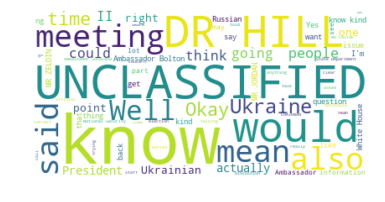

In [15]:
wordcloud(Hill)

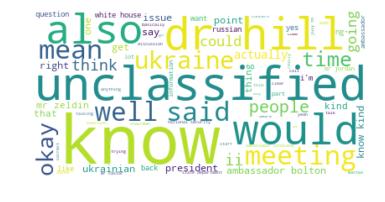

In [16]:
def testpreptxt(FILE):
    # Perform some basic cleaning and character removal.
    
    # Make everything lower case.
    text = FILE.lower()
    
    # Remove non-text characters.
    text = text.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
    text = re.sub(r'\d+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[''""-]', '', text)
    
    return text

def test_repl(TEXT):
    for i in string.punctuation:
        text=TEXT.replace(i,"")
    return text


HillWord2 = test_repl(Hill)
HillWord3 = testpreptxt(HillWord2)

wordcloud(HillWord3)

In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load('en_core_web_md')
Hill_nlp = nlp(HillWord3)

In [18]:
print (len(Hill_nlp))
print (Hill_nlp)

112890


unclassified           permanent select committee on intelligence,  joint with the  committee on oversight and reform  and the  committee on foreign affairs,  u.s. house of representatives,  washington, d.c.       	deposition of:	fiona hill          monday, october ,   washington, d.c.     the deposition in the above matter was held in room  hvc, capitol visitor center, commencing at : a.m.  unclassified	 present:	representatives schiff, carson, swalwell, and  heck.  also present:	representatives raskin, rouda, rooney,  jordan, zeldin, perry, and gaetz.                                         unclassif ied	  appearances:   	for the permanent select committee on intelligence: 	 	 	 	 	 	 	 	 	 	 	 	 	   	 	  	for the committee on oversight and reform: 	    unclassified	    	for the commi ttee on foreign affairs: 	 	 	 	    	for fiona hill:   samuels. ungar  lee wolosky  boies schiller flexner llp   new york avenue, nw  washington. d.c.                unclassified	  the chairman:	the com

In [19]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=False):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
HillCounter = word_frequencies(Hill_nlp).most_common(100)
print(HillCounter)

[(' ', 8953), ('\t', 4466), ('know', 1086), ('q', 966), ('  ', 673), ('mr', 605), ('ambassador', 428), ('unclassified', 354), ('\t  ', 344), ('dr', 329), ('president', 327), ('hill', 322), ('ukraine', 285), ('mean', 275), ('said', 267), ('okay', 227), ('people', 227), ('meeting', 227), ('time', 196), ('going', 195), ('t', 195), ('kind', 187), ('ii', 176), ('think', 169), ('actually', 152), ('th', 147), ('ng', 141), ('right', 131), ('bolton', 125), ('giuliani', 125), ('house', 123), ('point', 118), ('basically', 117), ('lot', 117), ('like', 115), ('trying', 115), ('zeldin', 113), ('security', 110), ('staff', 108), ('yeah', 108), ('ukrainian', 106), ('   ', 106), ('secretary', 106), ('white', 105), ('correct', 105), ('yes', 100), ('state', 99), ('chairman', 97), ('national', 97), ('want', 92), ('\t ', 91), ('question', 91), ('zelensky', 90), ('aware', 90), ('jordan', 89), ('     ', 89), ('sondland', 89), ('meetings', 84), ('told', 84), ('things', 84), ('issues', 83), ('information', 83),

In [20]:
witness = ['Hill', 'Yovanovitch', 'Vindman', 'Morrison', 'Taylor', 'Kent', 'Holmes', 
           'Sandy', 'Croft']
transcripts = ['FionaHillFull.txt', 'MashaYovanovitchFull.txt' , 'AlexanderVindmanFull.txt', 'TimMorrisonFull.txt',
              'BillTaylorFull.txt', 'GeorgeKentFull.txt', 'DavidHolmesFull.txt', 'MarkSandyFull.txt', 
               'CatherineCroftFull.txt']

df = pd.DataFrame(witness)


In [91]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = [HillWord3]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
FH = (vector.toarray())
print (FH)

{'unclassified': 4687, 'permanent': 3223, 'select': 3997, 'committee': 777, 'on': 3008, 'intelligence': 2202, 'joint': 2324, 'with': 4946, 'the': 4468, 'oversight': 3126, 'and': 188, 'reform': 3652, 'foreign': 1725, 'affairs': 94, 'house': 2060, 'of': 2976, 'representatives': 3742, 'washington': 4863, 'deposition': 1121, 'fiona': 1673, 'hill': 2020, 'monday': 2719, 'october': 2973, 'in': 2122, 'above': 7, 'matter': 2610, 'was': 4862, 'held': 1988, 'room': 3844, 'hvc': 2075, 'capitol': 592, 'visitor': 4826, 'center': 620, 'commencing': 766, 'at': 328, 'present': 3382, 'schiff': 3942, 'carson': 601, 'swalwell': 4373, 'heck': 1986, 'also': 160, 'raskin': 3562, 'rouda': 3856, 'rooney': 3846, 'jordan': 2329, 'zeldin': 5023, 'perry': 3229, 'gaetz': 1805, 'unclassif': 4684, 'ied': 2082, 'appearances': 236, 'for': 1718, 'commi': 772, 'ttee': 4631, 'samuels': 3912, 'ungar': 4719, 'lee': 2456, 'wolosky': 4957, 'boies': 490, 'schiller': 3943, 'flexner': 1694, 'llp': 2520, 'new': 2829, 'york': 501


(1, 5027)
<class 'scipy.sparse.csr.csr_matrix'>
[[ 1  1  1 ...  1 90  4]]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = [HillWord3]
# create the transform
vectorizer = TfidfVectorizer(max_features=2000, 
                             stop_words=stopwords) 
# tokenize and build vocab
vectorizer.fit_transform(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
HillVec = vectorizer.transform([text[0]])
# summarize encoded vector
print(HillVec.shape)
print(HillVec.toarray())


{'unclassified': 1880, 'permanent': 1271, 'select': 1591, 'committee': 318, 'intelligence': 854, 'joint': 896, 'oversight': 1234, 'reform': 1460, 'foreign': 677, 'affairs': 35, 'house': 803, 'representatives': 1500, 'washington': 1931, 'deposition': 458, 'fiona': 656, 'hill': 786, 'october': 1188, 'matter': 1035, 'held': 776, 'room': 1532, 'center': 267, 'present': 1337, 'schiff': 1569, 'heck': 775, 'also': 66, 'raskin': 1420, 'rouda': 1534, 'rooney': 1533, 'jordan': 897, 'zeldin': 1997, 'perry': 1273, 'gaetz': 706, 'unclassif': 1877, 'ied': 809, 'appearances': 104, 'commi': 316, 'ttee': 1854, 'ungar': 1888, 'lee': 965, 'wolosky': 1966, 'new': 1140, 'york': 1993, 'chairman': 274, 'come': 309, 'order': 1218, 'good': 739, 'morning': 1091, 'dr': 518, 'along': 63, 'committees': 319, 'conducting': 334, 'investigation': 875, 'part': 1243, 'official': 1194, 'impeachment': 819, 'inquiry': 846, 'today': 1821, 'conducted': 333, 'ry': 1553, 'white': 1955, 'administration': 26, 'direct': 480, 'wit


[1. 1. 1. ... 1. 1. 1.]
(1, 2000)
[[0.00197989 0.01385924 0.00148492 ... 0.05593192 0.04454755 0.00197989]]


In [23]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
import textacy
import textacy.extract

In [24]:

def topicinfo(sourcefile, topic):
    statements = textacy.extract.semistructured_statements(sourcefile, topic)
    # Print the results
    print("Here are the things I know about", topic,":")
    for statement in statements:
        subject, verb, fact = statement
        print(f" - {fact}")

In [53]:
topicinfo(Hill_nlp, 'ukraine')

Here are the things I know about ukraine :
 -  not a top policy item in a lot of this period.	
 - goi ng  through a massive period of upheaval itself in this period
 - in a really remarkable and very  difficult position.	
 - compliant with the  anticorruption requirement


# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(vector)

km(HillWord3)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

FionaH = open('Fiona-Hill-Testimony_compressed_1.txt', 'r')
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(FionaH)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.shape
data_dtm


,000,09d,0mb,10,100,102,103,104,105,106,...,yovanovi,yovanovitch,yuriy,zat,zed,zeldin,zelen,zelensky,zes,zlochevsky
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_dtm.columns.sum(column)

AttributeError: 'Index' object has no attribute 'sum'

In [38]:
sentences = list(Hill_nlp.sents)
print("Fiona Hill testimony has {} sentences.".format(len(sentences)))
example_sentence = sentences[103]
print("Here is an example: \n{}\n".format(example_sentence))

Fiona Hill testimony has 8683 sentences.
Here is an example: 
why don't you take your  spectacle outside?	



In [39]:
# Look at some metrics around this sentence.
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

There are 10 words in this sentence, and 10 of them are unique.


In [40]:
# View the part of speech for some tokens in our sentence.
print('\nParts of speech:')
for token in Hill_nlp[100:130]:
    print(token.orth_, token.pos_)


Parts of speech:
representatives NOUN
raskin PROPN
, PUNCT
rouda PROPN
, PUNCT
rooney PROPN
, PUNCT
  SPACE
jordan PROPN
, PUNCT
zeldin PROPN
, PUNCT
perry PROPN
, PUNCT
and CCONJ
gaetz PROPN
. PUNCT
                                         SPACE
unclassif PROPN
ied PROPN
	   SPACE
appearances NOUN
: PUNCT
  	 SPACE
for ADP
the DET
permanent ADJ
select ADJ
committee NOUN
on ADP


In [41]:
# View the dependencies for some tokens.
print('\nDependencies:')
for token in Hill_nlp[100:130]:
    print(token.orth_, token.dep_, token.head.orth_)


Dependencies:
representatives compound raskin
raskin ROOT raskin
, punct raskin
rouda conj raskin
, punct rouda
rooney conj rouda
, punct rooney
   ,
jordan conj rooney
, punct jordan
zeldin conj jordan
, punct zeldin
perry conj zeldin
, punct perry
and cc perry
gaetz conj perry
. punct raskin
                                          .
unclassif ROOT unclassif
ied intj unclassif
	    ied
appearances ROOT appearances
: punct appearances
  	  :
for prep appearances
the det committee
permanent amod committee
select compound committee
committee pobj for
on prep committee


In [42]:
# All of the uniqe entities spaCy thinks are people.
people = [entity.text for entity in list(Hill_nlp.ents) if entity.label_ == "PERSON"]
print(set(people))

{"perr y's", 'ted  ', 'working wi th', 'biden', 'lee', 'micha el elli s', 'furthe r relat', 'hill  ', 'tecollar', 'phil reeker', 'nonpoli ti', 'ngthewh', 'rada', 'fruman  ', 'sandland ii\t', 'hillary  ', 'pelosi uni', 'di sarray', 'di scussi ons', 'paula dobriansky', 'harley rouda', 'z lensky', 'thi ngs', 'scaparrotti', 'di scussed', 'thi', 'fferent  ', 'zlochevsky', 'fiona hill', 'rs', 'poi nt', 'nvolvin g communications', 'li ke  ', 'gence  ', 'charli e kupperman', 'rai', 'tim e', 'sondland io', 'don', 'goldman wi ll', 'tillerson', 't. ii', 'basi cally', 'marie yovanovitch', 'ty advi sor', 'jamie raskin', 'professi onal', 'fi ed', 'tim morrison', 'ii\t', 'reeker', 'si de', 'portfoli os', 'wells grif', 'rudy  ', 'a russianspeaking jew', 'patel', 'responsi ble', 'ki nd', 'chaly', 'nonpart', 'flynn  ', 'ja nuary', 'thi s', "rudy giuliani's", 'pence', 'ycu', 'ti m  morri', 'brin g', 'johnson', 'tom', 'gaetz', 'amos  hochstein', 'michael elli s', 'paul manafort', 'bolton', 'roger stone', 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
dfcv = cv.fit_transform(HillWord3)
dfdtm = pd.DataFrame(dfcv.toarray(), columns=cv.get_features_names())
dfdtm.index = Hill_clean.index
dfdtm

ValueError: Iterable over raw text documents expected, string object received.

###ALL OF CROFT###

from sklearn.feature_extraction.text import TfidfVectorizer




vectorizer = TfidfVectorizer(max_df=1, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
Hillvec=vectorizer.fit_transform(X_train)
print("Number of features: %d" % croft_X_train.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(croft_tfidf, test_size=0.3, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train)
print('Tf_idf vector:', tfidf_bypara)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

Hill_nlp_clean = []
for word in Hill:
    if word.is_stop==False:
        Hill_nlp_clean.append(word)
print(Hill_nlp_clean)

In [45]:
Hillsentences = list(Hill_nlp.sents)
for i in range(len(Hillsentences)):
 print(Hillsentences[i].text) 
 print('Number of characters:', len(Hillsentences[i].text))
 print(' — — — — — — — — — — — — — — — — — -')

unclassified           permanent select committee on intelligence,  joint with the  committee on oversight and reform  and the  committee on foreign affairs,  u.s. house of representatives,  washington, d.c.       	
Number of characters: 215
 — — — — — — — — — — — — — — — — — -
deposition of:	fiona hill          
Number of characters: 35
 — — — — — — — — — — — — — — — — — -
monday, october ,   washington, d.c.     
Number of characters: 41
 — — — — — — — — — — — — — — — — — -
the deposition in the above matter was held in room  hvc, capitol visitor center, commencing at : a.m.  unclassified	 
Number of characters: 118
 — — — — — — — — — — — — — — — — — -
present:	
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
representatives schiff, carson, swalwell, and  
Number of characters: 47
 — — — — — — — — — — — — — — — — — -
heck.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
also present:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
representa

Number of characters: 31
 — — — — — — — — — — — — — — — — — -
mr. gaetz:	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
you're going to have someone remove me from  the hearing?  
Number of characters: 59
 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
you're going to remove yourself,  mr. gaetz.  
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
mr. gaetz is going to stay and listen to  the testimony.  
Number of characters: 58
 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
mr. gaetz, you're going to leave the  room.  
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
mr. gaetz:	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
no, i think i have a right to be  is there  a rule you can cite as to why i am not   unclassified	  


 — — — — — — — — — — — — — — — — — -
mr. jordan:	i do.  
Number of characters: 19
 — — — — — — — — — — — — — — — — — -
on september th, speaker pelosi unilaterally     unclassified	  announced   the chairma
Number of characters: 87
 — — — — — — — — — — — — — — — — — -
n:	
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
the record should reflect that mr. gaetz  has left the room.  
Number of characters: 62
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
yes.  
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
on september th, speaker pelosi uni lateral ly announced  that the house was beginning a socalled impeachment
Number of characters: 109
 — — — — — — — — — — — — — — — — — -
i nquir y.  on october nd
Number of characters: 25
 — — — — — — — — — — — — — — — — — -
, speaker pelosi promised that the socalled  impeachment inquiry would treat the president with fairness.  
Number of characters: 107
 — 

 — — — — — — — — — — — — — — — — — -
lee zeldin, new york.  
Number of characters: 23
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
jim jordan, ohio. 	           	  
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
mr. castor:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
steve castor with the republican staff of  the oversight committee. 	        	
Number of characters: 78
 — — — — — — — — — — — — — — — — — -
mr. wolosky:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
i' m lee wolosky, counsel to dr. hill.  	
Number of characters: 41
 — — — — — — — — — — — — — — — — — -
mr. ungar:	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
i'm sam ungar, also counsel for dr. hill.  
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
dr. hill:	thank you.  
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
mr . goldman:	
Number of characters: 14
 — — 

if the chair overrules any such objection, you are required  to answer the question.  
Number of characters: 86
 — — — — — — — — — — — — — — — — — -
and, finally, you are reminded that it is unlawful to  
Number of characters: 55
 — — — — — — — — — — — — — — — — — -
unclassified	  deli berat ely provide false information to members of congress  or staff.	
Number of characters: 90
 — — — — — — — — — — — — — — — — — -
it is imperative that you not only answer our  questions truthfully but that you give full and complete  answers to all questions asked of you.	
Number of characters: 144
 — — — — — — — — — — — — — — — — — -
omissions may also be  considered to be false statements.  
Number of characters: 59
 — — — — — — — — — — — — — — — — — -
now, as this deposition is under oath, dr. hill, would  you please stand and raise your right hand to be sworn?	
Number of characters: 112
 — — — — — — — — — — — — — — — — — -
do  you answer or affirm that the testimony you are about to give  us is t

we must obtain your answers here because congress has a  constitutional duty to expose wrongdoing in the executive and  to act as a check and balance to the power of the executive,  especi ally when there is significant evidence that the  president is abusing his executive power for his own personal  gain.	
Number of characters: 308
 — — — — — — — — — — — — — — — — — -
the commi ttees cannot accept any effort to interfere  with these proceedings.	
Number of characters: 79
 — — — — — — — — — — — — — — — — — -
we therefore expect you do answer  all questions during the deposition.  
Number of characters: 73
 — — — — — — — — — — — — — — — — — -
with that, i will yield back to mr. goldman.  
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
onclassified	  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
mr. goldman:	thank you.  
Number of characters: 25
 — — — — — — — — — — — — — — — — — -
by mr. goldman:  q	
Number of characters: 19
 — — — — — — — — — — — — — — —

 — — — — — — — — — — — — — — — — — -
and, i guess, the first question, and this is perhaps a  little
Number of characters: 63
 — — — — — — — — — — — — — — — — — -
di ff
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
i cult, but can you describe, generally speaking,  what the offici al u.s. policy was related to ukraine and what  the focus of offi ci al u.s. poli cy was in relation to ukraine?  
Number of characters: 181
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i thi nk
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
the policy towards ukraine was going  through a period of evoluti on in the time that i was in the  admi ni strat i on.	
Number of characters: 120
 — — — — — — — — — — — — — — — — — -
many of you, being longserv
Number of characters: 27
 — — — — — — — — — — — — — — — — — -
i ng members of io	congress, and the staff
Number of characters: 42
 — — — — — — — — — — — — — — — — — -
, will of co

mr. goldman, can i just interject that the  witness is obviously testifying to u.s. deliberative  processes relating to the conduct of u.s. foreign policy.	
Number of characters: 156
 — — — — — — — — — — — — — — — — — -
i  actually don't think that this is covered by the letter from  the white house counsel's office, but i would appreciate  guidance and a ruling from the chair on testimony such as the  type that she is offering.  
Number of characters: 214
 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
i thank the counsel for raising the  issue, and i'm prepared to rule on it now.  
Number of characters: 81
 — — — — — — — — — — — — — — — — — -
dr. hill, you are compelled to testify at this     unclassified	  deposition by subpoena that was issued to you by the house  intelligence committee on october , .	
Number of characters: 164
 — — — — — — — — — — — — — — — — — -
your counsel has  raised a potential objection on beh

 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
actually, mr. j ordan , you were present at  a deposition conducted by chairman issa without the presence  of agency counsel, and you were perfectly copacetic with it  at that time, so your statement is not accurate.	
Number of characters: 217
 — — — — — — — — — — — — — — — — — -
but,  nonetheless, the chair has ruled and we will go forward.  
Number of characters: 64
 — — — — — — — — — — — — — — — — — -
mr. goldman.  
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
by mr. goldman:  q	
Number of characters: 19
 — — — — — — — — — — — — — — — — — -
dr. hill, ultimately toward  by the end of your  tenure at the nsc, had the united states agreed to provide  lethal military assistance to ukraine to withstand the  aggression from russia in the eastern area of ukraine?  
Number of characters: 221
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — 

Number of characters: 53
 — — — — — — — — — — — — — — — — — -
i ncred
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
i bly  difficult to keep up with what everybody else is doing as  well.  
Number of characters: 73
 — — — — — — — — — — — — — — — — — -
and i would often rely on members of our internal nsc  press corps, other colleagues, our directors, and other  unclassified	  people to flag anything for me that they thought that i  should be paying attent i on to.	
Number of characters: 217
 — — — — — — — — — — — — — — — — — -
i had every morning an intel  brief, and it didn't, you know,
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
basically always pertain to  domestic related issues, of course.  
Number of characters: 66
 — — — — — — — — — — — — — — — — — -
but we do get as much,
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
of course  i think most of you  who have served in government know this	compilations of  clippings that the white 

Number of characters: 2
 — — — — — — — — — — — — — — — — — -
did you speak to anyone else about this?  
Number of characters: 42
 — — — — — — — — — — — — — — — — — -
a	people in the state department also.  
Number of characters: 40
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
all right.	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
and what was their response?  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
everyone was completely unaware of any direct  official role that mr. giuliani had been given on the ukraine  account.	
Number of characters: 119
 — — — — — — — — — — — — — — — — — -
and, at that particular juncture, no one that i had  been in contact with had actually spoken to him.  
Number of characters: 103
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and what particular ju

 — — — — — — — — — — — — — — — — — -
so i'd experienced exactly the same treatment that she  had in the whole first year of my tenure at the national  security council, which is a period in which lieutenant  general mcmaster and many other members of staff were  targeted as well, and many people were hounded out of the  national security council because they became frightened  about their own security.  	
Number of characters: 371
 — — — — — — — — — — — — — — — — — -
i received, i just have to tell you, death threats,  calls at my home.	
Number of characters: 71
 — — — — — — — — — — — — — — — — — -
my neighbors reported somebody coming and  hammering on my door.	
Number of characters: 65
 — — — — — — — — — — — — — — — — — -
my	picked up a phone call  to have someone call me obscenities to •	. 	
Number of characters: 71
 — — — — — — — — — — — — — — — — — -
very  nervous about me testifying today as a result of that.  
Number of characters: 62
 — — — — — — — — — — — — — — — — — -
now, i'

 — — — — — — — — — — — — — — — — — -
i did.  
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and what was his reaction to this?  
Number of characters: 36
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
his reaction was pained.	
Number of characters: 25
 — — — — — — — — — — — — — — — — — -
and he basically said   in fact
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
, he directly said:	
Number of characters: 20
 — — — — — — — — — — — — — — — — — -
rudy giuliani is a hand grenade  that is going to blow everybody up.  
Number of characters: 70
 — — — — — — — — — — — — — — — — — -
he made it clear that he didn't feel that there was  anything that he could personally do about this.  
Number of characters: 103
 — — — — — — — — — — — — — — — — — -
i met with ambassador yovanovitch and assistant  secretary phil reeker on may st when she was recalle

and, as you know,  there's been a big debate since the beginning of the na ti onal  security council when it was first set up, you know, around  the time of, you know, world war ii and the cold war, about  what the right size, what the composition should be, and what  the approach should be, both of the national security advisor  and the staff.  
Number of characters: 348
 — — — — — — — — — — — — — — — — — -
unclassified	  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
now, so as it relates directly to ukraine, how many  conversations did you have with  were you present for where  the president was discussing ukraine, ukrainian policy, or  otherwise?  
Number of characters: 186
 — — — — — — — — — — — — — — — — — -
mr. wolosky:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
i think i t's fine to answer the question  of how many, generally speaking, times you were in  discussions with the pres

now, we'd had, of course, the election in april of  zelensky, but at this point, we were also waiting to see what  would happen in the ukrainian parliamentary elections, the  rada, to see whether zelensky would be able to have a  workable majority.  
Number of characters: 250
 — — — — — — — — — — — — — — — — — -
you might also recall in november of , there was the  incident in the kerch strait, where the russians sei zed naval  vessels of the ukrainian navy that were trying to enter  through international waters of the kerch strait into the sea  of azov and then detained their sailors after, in fact,  firing on the two ukrainian ships and injuring at least one,  but maybe more of the sai lors.	
Number of characters: 389
 — — — — — — — — — — — — — — — — — -
and they'd taken the sailors  to moscow.	
Number of characters: 41
 — — — — — — — — — — — — — — — — — -
they were effectively becoming prisoners of war.  
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
and we'd been fo

and that they were  also being pushed more generally in the ukrainian energy  sector to open up investigations into corruption in the  energy sector that seemed to go beyond what i had assumed was  the thrust of our push on corruption, which was related to  people trying to siphon off assets of naftogaz or to use that  improperly, which had been done at many times in the past,  and, in fact, would include the energy company burisma that  everyone has been very concerned about.  
Number of characters: 483
 — — — — — — — — — — — — — — — — — -
i, to be honest, had forgotten the name of burisma.	
Number of characters: 52
 — — — — — — — — — — — — — — — — — -
it      unclassified	  
Number of characters: 23
 — — — — — — — — — — — — — — — — — -
had been a long time since that name had surfaced.	
Number of characters: 51
 — — — — — — — — — — — — — — — — — -
it had  been on my radar screen sometime previously, and i asked amos  to remind me of the burisma issue.	
Number of characters: 106
 — — 

i went to consult several  times with senior state department officials to ask them if  unclassified	  
Number of characters: 103
 — — — — — — — — — — — — — — — — — -
they knew if this was the case.  
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and what did they say?  
Number of characters: 24
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
they said they had no  no directive, no  information to suggest this.  
Number of characters: 71
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and who did you speak to about this?  
Number of characters: 38
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i spoke to under secretary hale.	
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
i spoke to  assistant secretary reeker.	
Number of characters: 

secretary perry was also in attendance.	
Number of characters: 40
 — — — — — — — — — — — — — — — — — -
yermak had  an assistant.	
Number of characters: 26
 — — — — — — — — — — — — — — — — — -
ambassador sondland.	
Number of characters: 21
 — — — — — — — — — — — — — — — — — -
there was our ukraine  director, ambassador volker, and myself and our senior ii	director for energy affairs, wells griffith.  
Number of characters: 127
 — — — — — — — — — — — — — — — — — -
and there may have also been  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
the room got a bit  crowded
Number of characters: 27
 — — — — — — — — — — — — — — — — — -
and, i had to sit on the back sofa.	
Number of characters: 36
 — — — — — — — — — — — — — — — — — -
i think there  might have also been one of secretary perr y's aides with him  in that meeting.	
Number of characters: 95
 — — — — — — — — — — — — — — — — — -
and then there were other officials who  were also there in attendance, but not in ambassador

 — — — — — — — — — — — — — — — — — -
it was unclear what the content of the  meeting would be about, what kind of issues that we would  discuss that would be pertaining to ukrainianu.s. relations.  
Number of characters: 161
 — — — — — — — — — — — — — — — — — -
and secretary perry had been talking in this context      unclassified	  about the importance of reforming the energy structures in  ukraine in a very general sense and talking about how  important that was for ukrainian national security and that,  as well as reforming their national security structures, they  also have to
Number of characters: 325
 — — — — — — — — — — — — — — — — — -
, you know, really pay attention to their  achilles heel, all the places that russia had leverage, the  military sector, which ambassador bolton had also been  talking about, and then the energy sector, which was really  in some considerable di sarray.  
Number of characters: 254
 — — — — — — — — — — — — — — — — — -
then ambassador sondland blurte

 — — — — — — — — — — — — — — — — — -
you know, we have to talk about, you know,  
Number of characters: 44
 — — — — — — — — — — — — — — — — — -
the details of this.  
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
and he said:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
okay, okay, i get it.  
Number of characters: 23
 — — — — — — — — — — — — — — — — — -
and he asked the ukrainians to basically leave the room.  
Number of characters: 58
 — — — — — — — — — — — — — — — — — -
so they basically moved out into the corri dor.  
Number of characters: 49
 — — — — — — — — — — — — — — — — — -
and i said:	look, i don't know what's going on here,  but ambassador bolton wants to make it very clear that we  have to talk about, you know, how are we going to set up this  meeting.	
Number of characters: 185
 — — — — — — — — — — — — — — — — — -
it has to go through proper procedures.
Number of characters: 39
 — — — — — — — — — — — — — — — — — -
ii	
Number of characters:

he was  very angry.   
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
q   
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
a  
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
then you went down and spoke with eisenberg?
Number of characters: 44
 — — — — — — — — — — — — — — — — — -
yes, i went across to speak to him in the other   building.  
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and what did you tell eisenberg?  
Number of characters: 34
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i told ambassador eisenberg that ambassador bolton  had instructed me to go over there right away.	
Number of characters: 99
 — — — — — — — — — — — — — — — — — -
and i gave  him the details of what had transpired in the meeting in  ambassador bolton's office and then what i had overheard as i      unclassified	  
Number of cha

 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
that was going to be in ju ly.	
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
well, in actual  fact, at that poi nt  i'll have to go back and check.  
Number of characters: 72
 — — — — — — — — — — — — — — — — — -
perhaps we can all check whether it had actually been  announced because zelensky was under a great deal of pressure  internally, domesti cally, and also from the russi ans.  
Number of characters: 175
 — — — — — — — — — — — — — — — — — -
there was, you know, speculation in all analytical  circles, both in ukraine and outside, that he might not be  able to get a workable majority in the ukrainian parliament.  
Number of characters: 174
 — — — — — — — — — — — — — — — — — -
and all of us are very cognizant of the dangers of writing  congratulatory letters to people who can' t form governments.  
Number of characters: 123
 — — — — — — — — — — — — — — — — — -
we've 

and that had made president poroshenko very  uncomfortable
Number of characters: 58
 — — — — — — — — — — — — — — — — — -
and he had been agi tat i ng for some kind of  meeting in that timeframe,
Number of characters: 73
 — — — — — — — — — — — — — — — — — -
i ncludi ng with the vice president  or someone as well.  
Number of characters: 58
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
it's been posited that ambassador yovanovitch was  close to poroshenko, whether that 's true or untrue.  
Number of characters: 105
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
that's rubbish, just to be very clear.	
Number of characters: 39
 — — — — — — — — — — — — — — — — — -
then  anybody in the government who is interacting with poroshenko,  including the vice pres i dent, was  and the president was  close to poroshenko, and that's just not true.  
Number of characters: 177
 — — — — — — — — — 

 — — — — — — — — — — — — — — — — — -
sokov is a political operator of the highest  caliber and, you know, very wellknown in russian circles.  
Number of characters: 105
 — — — — — — — — — — — — — — — — — -
and also to deal with other european leaders who have been,  you know, actively involved and engaging with ukraine, and      unclassified	  
Number of characters: 140
 — — — — — — — — — — — — — — — — — -
our other allies, the canadians, you know, nato and others.  
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
but it was very much focused on the resolution of the  conflict in donbas.  
Number of characters: 76
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
with ambassador sondland's self assert ed authority  over at least parts of the ukrainian portfolio, who are the  other relevant u.s. officials, not rudy giuliani, but  
Number of characters: 169
 — — — — — — — — — — — — — — — — — -
relevant u.s. officials involv

 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
when did that occur?  
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
so he wasn't hired primarily  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
i t had occurred  when catherine croft left.  
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
when was that?  
Number of characters: 16
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
that would be sometim e toward the end of the summer  of .	
Number of characters: 59
 — — — — — — — — — — — — — — — — — -
every year, in the summer of   the summer we have  a rotati on of detailees.	
Number of characters: 77
 — — — — — — — — — — — — — — — — — -
most people are there for a year.  
Number of characters: 35
 — — — — — — — — —

 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
so you
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
di dn't know the call was scheduled   
Number of characters: 38
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i did not.  
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
as of july th?  
Number of characters: 16
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
as of ju ly th, i did not know it was scheduled.  
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
and on july th was the last day that i had formal io	interagency meetings.	
Number of characters: 75
 — — — — — — — — — — — — — — — — — -
and from july th, th, th and  th, i had meetings myself just to wrap up
Number of characters: 71
 — — — — — — — — — — — — — — — — — -

and i think i t's very  important to serve your country and to serve the president  and the presi dency , you know, as being duly elected.  
Number of characters: 140
 — — — — — — — — — — — — — — — — — -
and i thought it was very im portant to step up, as an  expert, as somebody who's been working on russia for  
Number of characters: 110
 — — — — — — — — — — — — — — — — — -
basi cally my whole entir e adult life, given what had happened  unclassified	  in  and given the peril that i actually thought that we  were in as a democracy, given what the russians i know to  have done in the course of the  elections.  
Number of characters: 240
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
so you say you were agnostic on the president, so  you hadn't been a critic of the president?  
Number of characters: 95
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i had not.	
Number of characters

Number of characters: 69
 — — — — — — — — — — — — — — — — — -
so, while people start parsing who's in our  calls, all of those calls could very easily be being recorded      unclassified	  as well as transcribed by a very la rg e phalanx of other  people on the other side of the call.	
Number of characters: 224
 — — — — — — — — — — — — — — — — — -
and i will, you know,  refer you to look at pictures that, for example, president  erd ogan of turkey would frequently release with himself  listening to the call with about as many people as are  sitting here in this room.         
Number of characters: 232
 — — — — — — — — — — — — — — — — — -
ii                           
Number of characters: 29
 — — — — — — — — — — — — — — — — — -
unclassif
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
ied	    by mr. castor:  
Number of characters: 24
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
did you speak with anyone?	
Number of ch

Number of characters: 50
 — — — — — — — — — — — — — — — — — -
well, it was because people  are rotating out, and everybody likes to go and relax and see  their friends.  
Number of characters: 108
 — — — — — — — — — — — — — — — — — -
mr. j ordan:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
doctor, you mentioned on september rd you  got a hint of the call or the content of   dr. hill:	
Number of characters: 96
 — — — — — — — — — — — — — — — — — -
no, i had more a hint that something was up,  
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
but i di dn 't know exactly what .     
Number of characters: 39
 — — — — — — — — — — — — — — — — — -
unclassified	  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
mr. jordan:	not a hint of the call, just a hint that  something was up.  
Number of characters: 73
 — — — — — — — — — — — — — — — — — -
dr. hill:	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
yeah.	
Number of characters: 6
 —

Number of characters: 23
 — — — — — — — — — — — — — — — — — -
i had to sit  on it to basically get a text.	
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
and i basically ran through  
Number of characters: 29
 — — — — — — — — — — — — — — — — — -
my entire data plan.	
Number of characters: 21
 — — — — — — — — — — — — — — — — — -
and when i eventually called   to get the data plan extended ,i	 	 	   when it came back on, i had found i had just bazillions  of texts and emails from press.	
Number of characters: 160
 — — — — — — — — — — — — — — — — — -
and i didn't know what was  unclassified	  
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
going on.	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
and i texted   nsc and a call.	
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
and i texted   
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
it was clearly about , who was   not actually di rectly related to all of this,

Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yeah,
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
well, you know, if i may just walk you     unclassified	  through this.	
Number of characters: 72
 — — — — — — — — — — — — — — — — — -
we first heard about you coming in for today's  allday interview, allday deposition, last wednesday night.  
Number of characters: 108
 — — — — — — — — — — — — — — — — — -
nobody told us earlier than wednesday.	
Number of characters: 39
 — — — — — — — — — — — — — — — — — -
i contacted your  lawyer on thursday to try to find out a little bit more  information and was unable to connect with your lawyer.	
Number of characters: 131
 — — — — — — — — — — — — — — — — — -
we  were in here all day friday.	
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
and, finally, i connected with  
Number of characters: 32
 — — — — — — — — — — — — — — — — — -
your lawyer for about  minutes last night.  
Number of characters: 44
 — — — 

 — — — — — — — — — — — — — — — — — -
it's an  extremely long, compound question.	
Number of characters: 44
 — — — — — — — — — — — — — — — — — -
you're referring to text  messages that are not being presented as exhibits.	
Number of characters: 77
 — — — — — — — — — — — — — — — — — -
so we're  happy to respond to a question if there 's a clear, specific  quest i on that you have for her.  
Number of characters: 107
 — — — — — — — — — — — — — — — — — -
by mr. castor:  
Number of characters: 16
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
there is an infrastructure of staff dealing with  the u.s.ukrainian relationship.  
Number of characters: 83
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
on that parti cular issue that you're talk
Number of characters: 42
 — — — — — — — — — — — — — — — — — -
i ng
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
about,  actually ther

we'll go back on the record.  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
mr. goldman.  
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
mr. goldman:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
thank you, mr. chairman.  
Number of characters: 26
 — — — — — — — — — — — — — — — — — -
by mr. goldma n:  
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
dr. hill, before, at the tail end of our initial ii	round, you were describing the circumstances around the 	july th meeting at the white house.  
Number of characters: 146
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes.  
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and i believe you said that, after you came back  from meeting in the ward room with the ukrainian counterpar ts  

but, at that point, i don't think he was  fully aware of the extensive meetings that ambassador volker  was having.	
Number of characters: 116
 — — — — — — — — — — — — — — — — — -
this may have been early on, when ambassador  volker had just started to meet with giuliani.  
Number of characters: 94
 — — — — — — — — — — — — — — — — — -
because i only, actually, to be honest, became familiar  with the tim eli ne once it was all published in the press.  
Number of characters: 118
 — — — — — — — — — — — — — — — — — -
because we'd already said to  again, i'd personally said to  ambassador volker and others that he shouldn't be talking to  mr. gi uli ani .  
Number of characters: 141
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and did you say that to mr. volker before that 	july th meeting?  
Number of characters: 66
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
absolutely.  
Numbe

well, that's what he said.	
Number of characters: 27
 — — — — — — — — — — — — — — — — — -
that's what i  mean.	
Number of characters: 21
 — — — — — — — — — — — — — — — — — -
this is part of  
Number of characters: 17
 — — — — — — — — — — — — — — — — — -
i mean, i think, you know, part of  the dilemma that we all have here in trying to  you, me,  and all of us  parse this, is that a lot of this is  happening on the television, in terms of statements that  giuliani has made.  
Number of characters: 225
 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
did that give content to you when you  heard these discussions going on, or did that inform  dr. hill:	
Number of characters: 103
 — — — — — — — — — — — — — — — — — -
correct, i t did.	
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
and it was clearly	i  mean, in ambassador bolton's office, when i was meeting with  him, the television was always on.	
Number of ch

because we were saying that we  didn't actually believe, at that particular juncture, that we  should have a meeting with zelensky.	
Number of characters: 132
 — — — — — — — — — — — — — — — — — -
because we wanted to  wait until the july  by this point
Number of characters: 56
 — — — — — — — — — — — — — — — — — -
, you know, i can't  remember exactly, you know  and forgive me  when it was  announced that the ukraine elections would be july st.  because there was some question about whether it would be a      unclassified	  snap election.	
Number of characters: 229
 — — — — — — — — — — — — — — — — — -
the actual election time might have been in  the fall.	
Number of characters: 55
 — — — — — — — — — — — — — — — — — -
you know, it could've been in october or, you  know, some other date.  
Number of characters: 71
 — — — — — — — — — — — — — — — — — -
and so we were waiting to see when the election would  be.	
Number of characters: 59
 — — — — — — — — — — — — — — — — — -
and we were pushin

i'm sorry, because i'm  getting my timelines confused here.	
Number of characters: 60
 — — — — — — — — — — — — — — — — — -
because the election  happened; there was a congratulatory phone call, which we,  you know, kind of, prepared just to say, hey,  congratulations, that was great.	
Number of characters: 162
 — — — — — — — — — — — — — — — — — -
and then the re was an idea  
Number of characters: 29
 — — — — — — — — — — — — — — — — — -
then there would be a letter that would be tied to the  inauguration.	
Number of characters: 70
 — — — — — — — — — — — — — — — — — -
and there was a lot of backandforth on when  that would be as well.  
Number of characters: 69
 — — — — — — — — — — — — — — — — — -
but that was on the ukrainian part .	
Number of characters: 37
 — — — — — — — — — — — — — — — — — -
because the  unclassified	  ukrainians, themselves, were not sure when to have the  inauguration, because, again, they were trying to determine  when they would call parliamentary rada elections

Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, because an awful lot of people were going in  the sit room and are having, you know,
Number of characters: 90
 — — — — — — — — — — — — — — — — — -
deli berati ve  conver sati ons that may or may not be classi fi ed on their way  into there.     
Number of characters: 98
 — — — — — — — — — — — — — — — — — -
unclassifi ed	  
Number of characters: 16
 — — — — — — — — — — — — — — — — — -
and there's a sign in the navy mess that says, you know,  
Number of characters: 58
 — — — — — — — — — — — — — — — — — -
do not have classified, you know, conversations in here  because, you know, external people may be present.	
Number of characters: 108
 — — — — — — — — — — — — — — — — — -
but on  the way to the sit room  
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
i don't know if you've been in the  space.	
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
it's about the space of, kind of, the interior here

Number of characters: 8
 — — — — — — — — — — — — — — — — — -
and i said tha t, actually, what i  unclassified	  would like would be for him to also ask my counterpart, wells  griffith, to talk to him too, who'd been in the meeting.  
Number of characters: 172
 — — — — — — — — — — — — — — — — — -
because i couldn't really determine, at the time, initially,  in the meeting with ambassador bolton, exactly what it was  that ambassador sandland had said that tri ggered off  ambassador bolton's reaction.  
Number of characters: 208
 — — — — — — — — — — — — — — — — — -
because secretary perry had been sticking to the regular  talking points about energy that we always had , you know,  that were obviously referring to naftogaz and, you know, to io	
Number of characters: 181
 — — — — — — — — — — — — — — — — — -
the energy sector writ large, which was, frankly, rife with ii	corruption.  
Number of characters: 76
 — — — — — — — — — — — — — — — — — -
and, you know, you may all recall, you know, un

Number of characters: 53
 — — — — — — — — — — — — — — — — — -
they were all, you know  
Number of characters: 25
 — — — — — — — — — — — — — — — — — -
i was behind sondland, and he was talk
Number of characters: 38
 — — — — — — — — — — — — — — — — — -
i ng forward.	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
so i  wasn't sure if i missed it or whether he d
Number of characters: 48
 — — — — — — — — — — — — — — — — — -
i dn' t say it at  all.   
Number of characters: 26
 — — — — — — — — — — — — — — — — — -
and i also wanted to be clear  sort of interrupt bolton and perry  because he seemed to you know, what it was  
Number of characters: 111
 — — — — — — — — — — — — — — — — — -
i  
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
that wells understood that secretary perry was talking about.
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
io	because this gets to the nub of what we're concerned about.
Number of characters: 62
 — — — — — — — — — —

and , you know, vice president pence has been, you know,  extremely good about stepping up when asked, you know, to go  and, you know, give speeches for munich security council  unclassified	  conference and other settings, for example.  
Number of characters: 238
 — — — — — — — — — — — — — — — — — -
but the other thing, it's often very difficult for him  to do these trips because of course he can't be out of the  country when the president is, and he has got other domestic  obligations, not least being here as representative as well.  
Number of characters: 240
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
right.	
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
there was some question about whether vice  president pence was going to attend zelensky's inauguration?  
Number of characters: 106
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
it depended on the date.	
N

so one of the  directors already went, and the western european portfolio  was di fferently arranged, and we didn't replace one of those  directors.  
Number of characters: 150
 — — — — — — — — — — — — — — — — — -
so, in fact,	had all of the eu,
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
ii	germany, italy, the vatican, spain, portugal.  
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
in the course of your experience did you ever come  into contact with national security staffers that had a  poli ti cal orientation?  
Number of characters: 135
 — — — — — — — — — — — — — — — — — -
a	wel,	
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
i mean, i had plenty of political appointees  from the administration.  
Number of characters: 72
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
any political or nonpoli ti cal appointees that 

 — — — — — — — — — — — — — — — — — -
and  general mcmaster was very focused on process.	
Number of characters: 51
 — — — — — — — — — — — — — — — — — -
he had a lot  of interagency meetings.	
Number of characters: 39
 — — — — — — — — — — — — — — — — — -
he was focused in the whole year  that he was there on the national security strategy and then  trying to create integrated strategies to pull all the policy  together.  
Number of characters: 170
 — — — — — — — — — — — — — — — — — -
so, you know, it was a very different, deliberative  approach, a lot of, you know, meetings in his office, a lot  of meetings with a lot of staff, you know, going through all  the national security principles.  
Number of characters: 211
 — — — — — — — — — — — — — — — — — -
and ambassador bolton, you know, is much more of the  view, as i think is well known about him, of a much smaller
Number of characters: 113
 — — — — — — — — — — — — — — — — — -
,  streamlined nati onal security staff in which just the  pr

remember, europe is all in  my portfolio as well.	
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
and we were very concerned that, you  know, it could become  
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
i was concern ed, and my cohort at     unclassified	  
Number of characters: 54
 — — — — — — — — — — — — — — — — — -
the time, that it's become a rift in our relations with  europe, that they might actually even step back from  sanctions or other commitments that they've made with us as a  government.  
Number of characters: 187
 — — — — — — — — — — — — — — — — — -
now.
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
when i got into the government, the administration,  i became actually more convinced that there was a thorough  plan, that our colleagues at the pentagon had really thought  all of this through, and that general abizaid and then, you  know, kind of his replacement, keith dayton, who had been  working on the behalf of the penta

i mean, it first got its independence  after the collapse of the soviet union and  lee will  actually remember this.	
Number of characters: 117
 — — — — — — — — — — — — — — — — — -
back in , we all worked on a  report called back in the ussr when we were at the kennedy  school that was basically documenting all of the efforts that  the russian government and boris yeltsin were actually making  to subvert the sovereignty of all of the new countries that  emerged out of the soviet union.  
Number of characters: 311
 — — — — — — — — — — — — — — — — — -
and we basically highlighted ukraine as being the most  vulnerable at that particular juncture because this was the  period when ukraine was being pushed to give up its nuclear  weapons.	
Number of characters: 187
 — — — — — — — — — — — — — — — — — -
and we actually wrote in the report that ukraine  shouldn't give up its nuclear weapons because there was a  good chance that they would then be predated upon by the  russians.	
Number of chara

 — — — — — — — — — — — — — — — — — -
and  actually made a huge messup because he was given a piece of  information from the 	prime min i ster that he should  have actually handed over to state department.	
Number of characters: 168
 — — — — — — — — — — — — — — — — — -
he sat on it  for  months.  
Number of characters: 28
 — — — — — — — — — — — — — — — — — -
and people at the state department had meetings that  were pertaining to that piece of paper, and it had never  actually been handed over.	
Number of characters: 139
 — — — — — — — — — — — — — — — — — -
and the 	thought that  their counterparts were either, you know, kind of insane or  deliberately obfuscating on the issues that they kept  raising.  
Number of characters: 149
 — — — — — — — — — — — — — — — — — -
the chairman:	
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
it's time,
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
mr. zeldin.     
Number of characters: 16
 — — — — — — — — — — — — — — — —

and when, in what time period did you realize that  that was what giuliani was pressing as well?  
Number of characters: 98
 — — — — — — — — — — — — — — — — — -
unclassified	  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, that began with the articles that i started  to see in the hill and others, you know, from march onwards.  
Number of characters: 113
 — — — — — — — — — — — — — — — — — -
and i started to pay attention to this.	
Number of characters: 40
 — — — — — — — — — — — — — — — — — -
there was also the  mentioning of george soros, which, again, has become this  crazy trope where every ti me somebody mentions the name of  george soros, there's a whole flurry of conspiracy theories,  and he seems to be basically orchestrating absolutely  everything.  
Number of characters: 270
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
right.	
Number of c

 — — — — — — — — — — — — — — — — — -
i mean, he  said it all the time.  
Number of characters: 35
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and did you have any conversations or did you hear  through other u.s. officials about how the ukrainians were  reacting to this  ii
Number of characters: 132
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes.	
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
i heard from   q	 
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
to this essential shadow foreign poli cy?  
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes, i heard from our embassy staff.	
Number of characters: 37
 — — — — — — — — — — — — — — — — — -
and this was  after masha yovanovitch had left as well.	
Number of characters: 56
 — — — — — — — — — — — — — — — — — -
i me

and that means that we  cannot be effective in working together with our european  allies on pushing back against russia or also trying to  enshrine ukraine's sovereignty.  
Number of characters: 173
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
i want to  
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
i'm going to jump around just a  little bit to cover some topics that you already spoke about.  
Number of characters: 96
 — — — — — — — — — — — — — — — — — -
the ju ly th and july th, , meetings with eisenberg,  are you aware of any documentation of the concerns that you     unclassified	  raised or mr. griffith raised with mr. eisenberg?  
Number of characters: 184
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i'm not.  
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
q	
Number of 

perhaps he had some initial encounter with him so that he was  clearly trying to  
Number of characters: 82
 — — — — — — — — — — — — — — — — — -
you know, getting back to the question  before  try to figure out, you know, how he could do, you  know, the right thing, in terms of trying to smooth this over  and trying to deflect away because he was just as concerned  as the rest of us were about the, you know, kind of  politicization or the distortion of u.s.ukrainian relations  or, you know, of u.s.ukra
Number of characters: 362
 — — — — — — — — — — — — — — — — — -
i ni an policy.  
Number of characters: 17
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and what did you say to volker when he suggested he 	may meet with giuliani?  
Number of characters: 78
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i thought that it was futile.	
Number of characters: 30
 — — — — — — — — — — — —

and i direct your attention to the entry, the first   entry on july th, .  
Number of characters: 75
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
uh h uh.  
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
do you see that?  
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes, i do, yes.  
Number of characters: 17
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
can you just read what that says?  
Number of characters: 35
 — — — — — — — — — — — — — — — — — -
a	which?	
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
hang on.	
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
it's the one that  q	
Number of characters: 21
 — — — — — — — — — — — — — — — — — -
yeah.      
Number of characters: 11
 — — — — — 

Number of characters: 121
 — — — — — — — — — — — — — — — — — -
and he did not think that he needed to do that.  
Number of characters: 49
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
did you have an understanding why he was   a	
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
he was also, of course, talking to ambassador  volker and secretary perry, and he did mention that.  
Number of characters: 101
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
why was he keeping ulrich brechbuhl in the loop?  
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
ulrich is a special counselor to  
Number of characters: 34
 — — — — — — — — — — — — — — — — — -
brechbuhl  to  secretary pompeo.	
Number of characters: 33
 — — — — — — — — — — — — — — — — — -
and, of course, secretary pompeo at this  time is on t

i mean  q	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
did any of them reach out to you, have any  communications with you?  
Number of characters: 70
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well , a lot of them have reached out to me and, you  know, kind of in solidarity, you know, because, i mean,  obviously, this i sn't a pleasant expe ri ence for everybody.  
Number of characters: 174
 — — — — — — — — — — — — — — — — — -
and i've had a few people who have reached out because  they're just very concerned about the future of the national  security council, and they're worried that, you know, all of  these issues will politicize what has, you know, up until now  been  again, has certainly strived to be a nonpolitical  body.   
Number of characters: 308
 — — — — — — — — — — — — — — — — — -
q
Number of characters: 1
 — — — — — — — — — — — — — — — — — -
anyone try to i nfluence your testimony?   
Number of cha

i think he's moved  on  press people, because we coordinated a lot of  statements in support of ambassador yovanovitch.  
Number of characters: 121
 — — — — — — — — — — — — — — — — — -
q ambassador taylor?  
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
a ambassador taylor, correct.  
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
q
Number of characters: 1
 — — — — — — — — — — — — — — — — — -
how about a former ambassador pyatt?  
Number of characters: 38
 — — — — — — — — — — — — — — — — — -
a no.
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
i've obviously had contact with ambassador  pyatt because he's ambassador to greece.
Number of characters: 84
 — — — — — — — — — — — — — — — — — -
is he still  ambassador to greece?
Number of characters: 34
 — — — — — — — — — — — — — — — — — -
he was, you know, last time when
Number of characters: 32
 — — — — — — — — — — — — — — — — — -
i ­  
Number of characters: 5
 — — — — — — — — — — — — — — — — — -

Number of characters: 64
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
uhhuh.  
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
the fact that the foreign assistance was frozen, it  occurred on july th, which was the day before   
Number of characters: 101
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yeah,
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
exactly.  
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
you left.	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
so you may not have a lot of  firsthand   a corr ect.  
Number of characters: 55
 — — — — — — — — — — — — — — — — — -
q 	facts, but  a
Number of characters: 16
 — — — — — — — — — — — — — — — — — -
and i already said that.  
Number of characters: 26
 — — — — — — — — — — — — — — — — — -
q  
Number o

because what i knew he was doing was, like,      unclassified	  political risk.	
Number of characters: 80
 — — — — — — — — — — — — — — — — — -
i thought he was, like, doing, like,  controlled risks or kroll.  
Number of characters: 66
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and all in my discussions with him, i mean, he was  clearly very interested in building up a client base.	
Number of characters: 106
 — — — — — — — — — — — — — — — — — -
i  almost fell over when i discovered that he was doing this   report.  
Number of characters: 72
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
so you have no idea whether he was desperate  and it related to his business interests or he w

it was related to burisma, and to the extent   the vice president's son was a director on burisma, that  could be a   a	correct.   
Number of characters: 131
 — — — — — — — — — — — — — — — — — -
q  
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
a  
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
but it wasn'
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
t vice president biden ­
Number of characters: 24
 — — — — — — — — — — — — — — — — — -
i di d not hear that.  
Number of characters: 23
 — — — — — — — — — — — — — — — — — -
unclassified	  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
himself.	
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
and you never heard of any  reason why anybody should be investigating vice president  bi den ?  
Number of characters: 97
 — — — — — — — — — — — 

 — — — — — — — — — — — — — — — — — -
and what do you know about the alternative server      
Number of characters: 55
 — — — — — — — — — — — — — — — — — -
unclassified	  arrangements?  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i'm not going to talk about it because it's  
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
classified   
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and it shouldn't be used for thi s kind of  material  
Number of characters: 54
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	 unless i t has classified content.	
Number of characte

 — — — — — — — — — — — — — — — — — -
and i wanted to make sure
Number of characters: 25
 — — — — — — — — — — — — — — — — — -
tha t
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
i wasn't, you  know, kind of, purporting thi ngs being said by secretary  perry to be part of this as well.  
Number of characters: 109
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
uhhuh.  
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
because secretary perry had been talk
Number of characters: 37
 — — — — — — — — — — — — — — — — — -
i ng
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
at great  length about energy sector and corrupt i on.
Number of characters: 54
 — — — — — — — — — — — — — — — — — -
and at no point ,	did i thi nk that anything secretary perry said referred to  unclassified	  
Number of characters: 94
 — — — — — — — — — — — — — — — — —

all of the different aspects of european energy  to bring ukraine into this so that it wasn' t just the united  states trying to push on nord stream .	
Number of characters: 151
 — — — — — — — — — — — — — — — — — -
so we got the  germans, the poles, the romanians, and others to  czechs,  slovaks  to step up and to help the ukrainians.  
Number of characters: 123
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
uhhuh.	
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
and he led the delegation to president  zelensky's inauguration?  
Number of characters: 66
 — — — — — — — — — — — — — — — — — -
a	correct.  
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and he was involved with, it's been reported, some  debriefing of the president about that   a	
Number of characters: 95
 — — — — — — — — — — — — — — — — — -
he was.	
Number of characters: 8
 — — —

 — — — — — — — — — — — — — — — — — -
and, basically, at thi s point,  sondland has made himself a target for foreign powers,  because he's basically tell i ng people, i can get you into the  white house
Number of characters: 165
 — — — — — — — — — — — — — — — — — -
, i can get you in to see ambassador bolton.  
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
you know, you show up at the door, and, i mean, i think  all of you who have tried to show up at the door of the white  house will know it's actually not that easy to get in
Number of characters: 173
 — — — — — — — — — — — — — — — — — -
and you  have to go through all kinds of procedures.	
Number of characters: 53
 — — — — — — — — — — — — — — — — — -
you can't just,  kind of, appear at the doorstep and be let in by the secret  service.  
Number of characters: 88
 — — — — — — — — — — — — — — — — — -
people were li tera lly coming up at the door because  sondland was	
Number of characters: 68
 — — — — — — — — — — — — — 

Number of characters: 101
 — — — — — — — — — — — — — — — — — -
the president always congratulates people.	
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
and we always  have a lot of people wanting to put things into, you know,  presidential call packages for the historical record.	
Number of characters: 129
 — — — — — — — — — — — — — — — — — -
and it  was the state department that had requested that we write  that in.  
Number of characters: 77
 — — — — — — — — — — — — — — — — — -
mr. zeldin:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
i guess just due to the subject matter of  why we're here, i won't ask further on that, but in another  setting i'd have some followup questions.  
Number of characters: 147
 — — — — — — — — — — — — — — — — — -
dr. hill:	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
but this gives you the, kind of, sense of how  these things can be manipulated, you know, by people, which  is also deeply disturbing.	
Num

Number of characters: 124
 — — — — — — — — — — — — — — — — — -
i'd been hired by general flynn and k.t. and general  kellogg, and so we had to wait a per iod to see if general  mcmaster wanted to continue with the hi r i ng process.      
Number of characters: 175
 — — — — — — — — — — — — — — — — — -
unclassified	  	 	   	 	  
Number of characters: 26
 — — — — — — — — — — — — — — — — — -
mr. zeldin:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
and i apologize for bouncing around a  little bit.	
Number of characters: 51
 — — — — — — — — — — — — — — — — — -
just some questions from earlier rounds. 	
Number of characters: 42
 — — — — — — — — — — — — — — — — — -
september rd, you mentioned that you came back, spoke 	to your team, and one of the people you spoke to was tim ii morrison.  
Number of characters: 126
 — — — — — — — — — — — — — — — — — -
dr. hill:	correct.  
Number of characters: 20
 — — — — — — — — — — — — — — — — — -
mr. zeldin:	
Number of characters: 12
 — —

we've had these before, you know, related to a  congressional inquiry or anything else, saying that we had to  retain all documents pertaining  any kind of  communications.  
Number of characters: 174
 — — — — — — — — — — — — — — — — — -
and, you know, as i said, i'd already handed in my box  
Number of characters: 56
 — — — — — — — — — — — — — — — — — -
and, you know, did a big purge of my office.	
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
and i'd also  handed over things to colleagues that i thought would be  useful for them for continuity purposes.	
Number of characters: 113
 — — — — — — — — — — — — — — — — — -
and that's why i  was nervous.	
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
you know, i thought, oops, did i retain ii	
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
everything i was supposed to?	
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
and i didn't know what this  was about.  
Number of characters: 4

Number of characters: 13
 — — — — — — — — — — — — — — — — — -
mr. jordan, i'm sorry to interrupt, but i  don't believe that was what ambassador yovanovitch testified.  
Number of characters: 106
 — — — — — — — — — — — — — — — — — -
and maybe if we could just ask  she wasn't there for this,  
Number of characters: 60
 — — — — — — — — — — — — — — — — — -
so  
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
i'm reading from her statement.	
Number of characters: 32
 — — — — — — — — — — — — — — — — — -
she said,  during the   	which i think has been public.	
Number of characters: 56
 — — — — — — — — — — — — — — — — — -
and i  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
th
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i
Number of characters: 1
 — — — — — — — — — — — — — — — — — -
nk dr.
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
hi ll  
Number of characte

q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
you did not watch it?  
Number of characters: 23
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i was with my mother, and i did not watch it.	
Number of characters: 46
 — — — — — — — — — — — — — — — — — -
i'm  sorry.  
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
well, during that press conference,  president trump said something along the lines that president  zelensky should meet with vladimir putin and settle their  disagreement.	
Number of characters: 173
 — — — — — — — — — — — — — — — — — -
was a putinzelensky meeting ever part of  u.s. policy
Number of characters: 53
 — — — — — — — — — — — — — — — — — -
when you were working at the national security   unclassified     council?
Number of characters: 74
 — — — — — — — —

but we were hoping that we could get, you know, kind of,  putin to see it's somehow, you know, kind of, in his  interest, a recalculation and a recalibration of russian  policy, to at least begin to engage with zelensky.  
Number of characters: 222
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
would a meeting between president trump and  president zelensky following zelensky's election be something  that the russians would be paying attention to?  
Number of characters: 157
 — — — — — — — — — — — — — — — — — -
a	sure.  
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
why is that?  
Number of characters: 14
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, first of all, they are very interested in ii	finding out whether they can drive a wedge between ukraine  and the united states.	
Number of characte

 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i did.   
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
notes or the summary of that meeting were placed in the  system?  
Number of characters: 66
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
to my knowledge, it was not.  
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
but i don't know for sure.  
Number of characters: 28
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
there were concerns about that transcript being  leaked, 

there's been some public discussion of this, but i  feel that this might be verging into secure, you know  
Number of characters: 107
 — — — — — — — — — — — — — — — — — -
mr. wolosky:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
i'm sorry.	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
could you repeat   mr. noble:	
Number of characters: 30
 — — — — — — — — — — — — — — — — — -
yeah.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
i was asking her to explain the  process of creating a call summary.	
Number of characters: 69
 — — — — — — — — — — — — — — — — — -
so there's a call that  occurs.	
Number of characters: 32
 — — — — — — — — — — — — — — — — — -
what's the process by which notes are taken?	
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
is  there a verbatim transcript created?  
Number of characters: 42
 — — — — — — — — — — — — — — — — — -
dr. hill:	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
is th

Number of characters: 90
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i had never heard anything about that.  
Number of characters: 40
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
did you ever see those types of materials or a  similar dossie floating around the white house?  
Number of characters: 97
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i did not.  
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
i believe in the last segment of testimony you said that ii	you had some conversations with deputy secretary of state  
Number of characters: 119
 — — — — — — — — — — — — — — — — — -
sullivan  
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
a	correct.  
Number

Number of characters: 52
 — — — — — — — — — — — — — — — — — -
express concerns to them about any issue.  
Number of characters: 43
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and    
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
so i probably talked to michael on a number of  occasions about this, just in a general,
Number of characters: 88
 — — — — — — — — — — — — — — — — — -
hey, you know, this  is going on and i'm worried about it.  
Number of characters: 60
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
uhhuh.	
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
did you ever ask him to do anything in  particular about   
Number of characters: 59
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i did not.	
Number of characters: 11
 — — 

 — — — — — — — — — — — — — — — — — -
what did you know about that?  
Number of characters: 31
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, konstantin kilimnik is somebody   if we're  in the space of who knew people in the past, he used to work  unclass
Number of characters: 119
 — — — — — — — — — — — — — — — — — -
i
Number of characters: 1
 — — — — — — — — — — — — — — — — — -
f i ed	  
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
for the international republican institute in moscow.	
Number of characters: 54
 — — — — — — — — — — — — — — — — — -
and  when i was working at the kennedy school of government on  technical assistance projects, you know, we had a lot of  
Number of characters: 122
 — — — — — — — — — — — — — — — — — -
i ntera cti ons with !
Number of characters: 22
 — — — — — — — — — — — — — — — — — -
ri as well as nd!,
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
and
Number of chara

Number of characters: 22
 — — — — — — — — — — — — — — — — — -
and i went to talk to charlie kupperman, who was going  to be taking part on our behalf sitting in on the debriefing  for the president.	
Number of characters: 137
 — — — — — — — — — — — — — — — — — -
and i sai d:	apparently, the president 	may think that kash patel is our ukraine director, and i just  want to make sure there's no embarrassment here.	
Number of characters: 152
 — — — — — — — — — — — — — — — — — -
i'm not  qui te sure why that might be, but i want to flag for you that  this is the case.  
Number of characters: 92
 — — — — — — — — — — — — — — — — — -
and i related what i related to you.	
Number of characters: 37
 — — — — — — — — — — — — — — — — — -
and i sai d:	that  probably means that alex vi ndman , our ukraine director who  had actually been on the presi denti al delegation, probably  shouldn ' t go into the debrief from the delegat i on.  
Number of characters: 199
 — — — — — — — — — — — — — — — — — -
q	


you know  let's just say it's a red flag  when somebody who you barely know is involved on, you know,  one of your policy issues and is clearly providing, you know,  materials outside of the line that we don't even know what  those materials were.  
Number of characters: 249
 — — — — — — — — — — — — — — — — — -
and we were always very circumspect about the materials  that we provided, and we only ever sent them up the chain to  the exec sec to ambassador bolton.	
Number of characters: 154
 — — — — — — — — — — — — — — — — — -
so, i mean, we never did  anything to the president's or to the chief of staff or  anything else except through the national security advi sor.  
Number of characters: 145
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and it's your understanding, though, that these  materials that mr. patel provided made their way directly to  president trump?  
Number of characters: 129
 — — — — — — — — — — — — — — — — — -
a	


that's when, you know, i mentioned to you that  ambassador bolton, who looked extremely pained, you know,  basically said there was nothing that could be done, but rudy  giuliani was
Number of characters: 182
 — — — — — — — — — — — — — — — — — -
a   q  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
a  
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
that's the hand grenade comment?  
Number of characters: 34
 — — — — — — — — — — — — — — — — — -
hand grenade,
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
yeah, that's going to blow   everybody up.  
Number of characters: 44
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
and who is general kellogg?  
Number of characters: 29
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
he is the now national security advisor to the vice 

and i also had jennifer williams, his director who covered  all of europe, who was our counterpart there  
Number of characters: 106
 — — — — — — — — — — — — — — — — — -
i mean,  again, we talked about how small the vice president's team  is  and she was also in the meeting.  
Number of characters: 107
 — — — — — — — — — — — — — — — — — -
so i wanted to make sure that they knew that there were  issues and they should be very careful, you know, so that the  vice president didn't, you know, get mired up in  you know,  
Number of characters: 181
 — — — — — — — — — — — — — — — — — -
i was flagging, you know, in case rudy giuliani or anybody  who's sort of seeking meetings.  
Number of characters: 93
 — — — — — — — — — — — — — — — — — -
we did this frequently.	
Number of characters: 24
 — — — — — — — — — — — — — — — — — -
i mean, that's what the vice  presi dent's staff would rely on us for sendi ng red flags to  them for, you know, meetings they should avoid or.
Number of characters: 143
 

a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
i think he said it publicly, bu t definitely  mr. giuliani has said things in that regard .
Number of characters: 91
 — — — — — — — — — — — — — — — — — -
io	
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
turning to page , on may th, that friday, it  looks like you had a meeting with ambassador taylor   
Number of characters: 100
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
that's right.  
Number of characters: 15
 — — — — — — — — — — — — — — — — — -
q	 
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
and mr. vindman?  
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes.	
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
and i had a previous meeting with ambassador  taylor on the th.	
Numbe

and the germans were also at this point talking about  bringing through bremen, and through a new port, lng into  germany that also could come into ukraine
Number of characters: 155
 — — — — — — — — — — — — — — — — — -
i f
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
there was indeed  a building up of the infrastructure in that part of europe.  
Number of characters: 79
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
on page ,	we're moving into early june,  
Number of characters: 41
 — — — — — — — — — — — — — — — — — -
you had a svtc with ambassador volker, it looks like?  
Number of characters: 55
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
yes.	
Number of characters: 5
 — — — — — — — — — — — — — — — — — -
that was for him to update the europeans on,  you know, the presidential delegation and s

 — — — — — — — — — — — — — — — — — -
did you communicate your issue with ambassador  bolton?  
Number of characters: 57
 — — — — — — — — — — — — — — — — — -
a	charlie kupperman said he would speak to ambassador  bolton about this.  
Number of characters: 75
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
and did he ever get back to you about what   the  a   q    he said that he was dealing with it.
Number of characters: 95
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
that's it?	
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
that was the end of it?   
Number of characters: 26i mean, we have what  president zelensky said.	
Number of characters: 47
 — — — — — — — — — — — — — — — — — -
he obviously wanted a new  ambassador just like president trump did.  
Number of characters: 70
 — — — — — — — —

so, if you start to actually look at this paragraph  here, and i worked as a translator as well , as an  interpreter, just to be clear here, and i do speak ukrainian,  although not as well as i speak russian, and
Number of characters: 212
 — — — — — — — — — — — — — — — — — -
what he's saying  here is he has got confused between the ambassador to the  united states from ukraine, which could, in actual fact, be  his ambassador, the ukrainian ambassador to the united  states.	
Number of characters: 202
 — — — — — — — — — — — — — — — — — -
so he's getting himself confused in this particular  point here.
Number of characters: 64
 — — — — — — — — — — — — — — — — — -
io	
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
what was her name  or his name, excuse  me?  
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
dr.
Number of characters: 3
 — — — — — — — — — — — — — — — — — -
hil l
Number of ch

 — — — — — — — — — — — — — — — — — -
i wouldn' t have talked to him in that  unclassified	  position, but whether it's proper or not, i think, is a  judgment for assistant secretary nuland and others.  
Number of characters: 165
 — — — — — — — — — — — — — — — — — -
mr. zeldin:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
this was in the midst of the  election,  correct?  
Number of characters: 51
 — — — — — — — — — — — — — — — — — -
dr. hill:	
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
i believe that's the case.	
Number of characters: 27
 — — — — — — — — — — — — — — — — — -
i mean, i read  about this later, and kathy kavalec told me that she'd been  instructed to go and talk to him.  
Number of characters: 112
 — — — — — — — — — — — — — — — — — -
mr. zeldin:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
has anything been stated so far today that  you would describe as classified, or would you say everything  up to this point is uncl

and that's when,  obviously, i thought, whoa,
Number of characters: 45
 — — — — — — — — — — — — — — — — — -
okay.     
Number of characters: 10
 — — — — — — — — — — — — — — — — — -
he  
Number of characters: 4
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
when you mentioned this to charlie kupperman, did    a   q   
Number of characters: 61
 — — — — — — — — — — — — — — — — — -
a  q  
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
he was surprised.
Number of characters: 17
 — — — — — — — — — — — — — — — — — -
i was going to say, did he know about this at all?
Number of characters: 50
 — — — — — — — — — — — — — — — — — -
he did not.
Number of characters: 11
 — — — — — — — — — — — — — — — — — -
okay.	
Number of characters: 6
 — — — — — — — — — — — — — — — — — -
did he indicate to you whether he understood   that ambassador bolton knew of this at all?  
Number of characters: 92
 — — — — — — — — — — — — — — — — — -
a	
Numb

what do you mean by that?  
Number of characters: 27
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, obv
Number of characters: 9
 — — — — — — — — — — — — — — — — — -
i
Number of characters: 1
 — — — — — — — — — — — — — — — — — -
ously , it wasn't related to the isues  that we were working on.	
Number of characters: 65
 — — — — — — — — — — — — — — — — — -
it had to be something else.	
Number of characters: 29
 — — — — — — — — — — — — — — — — — -
and i i	
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
then, you know, as i expressed  charlie had already  i'd  already expressed to charlie kupperman my concerns about the  giu li an i accusati ons, and i had no idea whether this was  relat ed to this or to any other
Number of characters: 214
 — — — — — — — — — — — — — — — — — -
i ssue.	
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
again, i don't want  to speculate.	
Number of characters: 35
 — — — — — — 

Number of characters: 110
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
in terms of providing, you know,
Number of characters: 32
 — — — — — — — — — — — — — — — — — -
more information  with hindsight, unfort unately, yes.  
Number of characters: 56
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
and in what way?  
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
the specific references, also juxtaposed with the  release of the text messages by ambassador volker  you  
Number of characters: 107
 — — — — — — — — — — — — — — — — — -
know, what i said before  really was kind of my worst fears  and nightmares, in term s of, you know, there bei ng some kind  of effort not just to subvert the national security process,  but to try to subvert what really should be, you know, kind  of, a diplomatic effort to, you

 — — — — — — — — — — — — — — — — — -
the call record.  
Number of characters: 18
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
well, based on what i read in the transcript and  what she said in he r
Number of characters: 71
 — — — — — — — — — — — — — — — — — -
testimony, which was obviously told to  her, then i have a different view  
Number of characters: 75
 — — — — — — — — — — — — — — — — — -
well, i have the view  that we're now discussing, that the president asked for her  to be removed.  
Number of characters: 100
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
okay.  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
and i don't mean to belabor thi s, but rudy giuliani was  not a government official.	
Number of characters: 85
 — — — — — — — — — — — — — — — — — -
and so, did you have an  understanding of for whom he was acting on behalf of?  
Number of characters

 — — — — — — — — — — — — — — — — — -
a   q  
Number of characters: 7
 — — — — — — — — — — — — — — — — — -
this is a bund li ng of a number of i ssues.
Number of characters: 44
 — — — — — — — — — — — — — — — — — -
so am i correct in understanding that there could   be a number of different i nterests that are   a	
Number of characters: 101
 — — — — — — — — — — — — — — — — — -
my view, in looking at this, is tha t individuals,  private individuals, like mr. gi uli ani and his business  associates, are trying to appropriate presi denti al power or  the authority of the president, given the position that  mr. giuliani is in, to also pursue their own personal  interests.  
Number of characters: 298
 — — — — — — — — — — — — — — — — — -
q	
Number of characters: 2
 — — — — — — — — — — — — — — — — — -
but the president was willing to provide the  presidential power in that july th call.  
Number of characters: 88
 — — — — — — — — — — — — — — — — — -
a	
Number of characters: 2
 — — — — — — — — —

 — — — — — — — — — — — — — — — — — -
mr. jor dan:	
Number of characters: 13
 — — — — — — — — — — — — — — — — — -
and would the individuals   dr. hill:	
Number of characters: 38
 — — — — — — — — — — — — — — — — — -
so i asked them to parse through and see, you  know, what individuals were on and then to see what it would  be about followon mater
Number of characters: 132
 — — — — — — — — — — — — — — — — — -
i als.  
Number of characters: 8
 — — — — — — — — — — — — — — — — — -
so, just to be kind of clear about this, i mean, a lot  of these distribution lists are on our classi fi ed system, not  just on our unclass system.	
Number of characters: 149
 — — — — — — — — — — — — — — — — — -
and sometim es they have attached  to them a lot of background materials.  
Number of characters: 75
 — — — — — — — — — — — — — — — — — -
mr. jordan:	
Number of characters: 12
 — — — — — — — — — — — — — — — — — -
that was my next question.  
Number of characters: 28
 — — — — — — — — — — — — — — — — — -
dr.

In [46]:
import textacy.extract

# Extract noun chunks that appear
noun_chunks = textacy.extract.noun_chunks(Hill_nlp, min_freq=3)

# Convert noun chunks to lowercase strings
noun_chunks = map(str, noun_chunks)

# Print out any nouns that are at least 2 words long
for noun_chunk in set(noun_chunks):
    if len(noun_chunk.split(" ")) > 1:
        print(noun_chunk)

In [57]:
import textblob
from textblob import TextBlob

TextBlob(HillWord3).sentiment

Sentiment(polarity=0.102578292521749, subjectivity=0.4514956319214005)

In [60]:
FHillBlob = TextBlob(HillWord3)

In [61]:
FHillBlob.tags

[('unclassified', 'JJ'),
 ('permanent', 'JJ'),
 ('select', 'JJ'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('intelligence', 'NN'),
 ('joint', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('oversight', 'NN'),
 ('and', 'CC'),
 ('reform', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('committee', 'NN'),
 ('on', 'IN'),
 ('foreign', 'JJ'),
 ('affairs', 'NNS'),
 ('u.s.', 'JJ'),
 ('house', 'NN'),
 ('of', 'IN'),
 ('representatives', 'NNS'),
 ('washington', 'NN'),
 ('d.c.', 'JJ'),
 ('deposition', 'NN'),
 ('of', 'IN'),
 ('fiona', 'NN'),
 ('hill', 'NN'),
 ('monday', 'NN'),
 ('october', 'NN'),
 ('washington', 'NN'),
 ('d.c.', 'VBZ'),
 ('the', 'DT'),
 ('deposition', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('above', 'JJ'),
 ('matter', 'NN'),
 ('was', 'VBD'),
 ('held', 'VBN'),
 ('in', 'IN'),
 ('room', 'NN'),
 ('hvc', 'NN'),
 ('capitol', 'JJ'),
 ('visitor', 'NN'),
 ('center', 'NN'),
 ('commencing', 'VBG'),
 ('at', 'IN'),
 ('a.m.', 'NN'),
 ('unclassified', 'JJ'),
 ('present', 'N

In [62]:
FHillBlob.noun_phrases

WordList(['permanent select committee', 'foreign affairs', 'u.s. house', 'd.c. deposition', 'fiona hill monday', 'above matter', 'room hvc', 'capitol visitor center', 'representatives schiff', 'representatives raskin', 'permanent select committee', 'commi ttee', 'foreign affairs', 'fiona hill', 'ungar lee wolosky boies schiller flexner llp', 'new york avenue', 'nw washington', 'good morning', 'dr. hill', 'permanent select committee', 'foreign affairs', 'oversight committees', 'official impeachment inquiry', "'s deposition", 'i nqui ry', 'white house administration', 'direct witnesses', 'congressional subpoena', 'dr. hill', 'national intelligence officer', 'eu rasi', 'national intelligence council', 'senior fellow', 'brookings institution', 'deputy assistant', 'senior director', 'nati onal security council staff', 'recent work', 'white house', 'dr. hill', 'unique position', 'key policy discussions', 'relate d i', 'dr. hill', "president 's", 'ukrainian president zelensky', 'i nterac ti o

In [63]:
FHillBlob.words

WordList(['unclassified', 'permanent', 'select', 'committee', 'on', 'intelligence', 'joint', 'with', 'the', 'committee', 'on', 'oversight', 'and', 'reform', 'and', 'the', 'committee', 'on', 'foreign', 'affairs', 'u.s', 'house', 'of', 'representatives', 'washington', 'd.c', 'deposition', 'of', 'fiona', 'hill', 'monday', 'october', 'washington', 'd.c', 'the', 'deposition', 'in', 'the', 'above', 'matter', 'was', 'held', 'in', 'room', 'hvc', 'capitol', 'visitor', 'center', 'commencing', 'at', 'a.m', 'unclassified', 'present', 'representatives', 'schiff', 'carson', 'swalwell', 'and', 'heck', 'also', 'present', 'representatives', 'raskin', 'rouda', 'rooney', 'jordan', 'zeldin', 'perry', 'and', 'gaetz', 'unclassif', 'ied', 'appearances', 'for', 'the', 'permanent', 'select', 'committee', 'on', 'intelligence', 'for', 'the', 'committee', 'on', 'oversight', 'and', 'reform', 'unclassified', 'for', 'the', 'commi', 'ttee', 'on', 'foreign', 'affairs', 'for', 'fiona', 'hill', 'samuels', 'ungar', 'lee'

In [64]:
FHillBlob.sentences

[Sentence("unclassified           permanent select committee on intelligence,  joint with the  committee on oversight and reform  and the  committee on foreign affairs,  u.s. house of representatives,  washington, d.c.       	deposition of:	fiona hill          monday, october ,   washington, d.c.     the deposition in the above matter was held in room  hvc, capitol visitor center, commencing at : a.m.  unclassified	 present:	representatives schiff, carson, swalwell, and  heck."),
 Sentence("also present:	representatives raskin, rouda, rooney,  jordan, zeldin, perry, and gaetz."),
 Sentence("unclassif ied	  appearances:   	for the permanent select committee on intelligence: 	 	 	 	 	 	 	 	 	 	 	 	 	   	 	  	for the committee on oversight and reform: 	    unclassified	    	for the commi ttee on foreign affairs: 	 	 	 	    	for fiona hill:   samuels."),
 Sentence("ungar  lee wolosky  boies schiller flexner llp   new york avenue, nw  washington."),
 Sentence("d.c.                unclassifi

In [69]:
for sentence in FHillBlob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.05625, subjectivity=0.08125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivity=0.125)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4583333333333333, subjectivity=0.5416666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.375)
Sentiment(polarity=0.22916666666666666, subjectivity=0.5416666666666666)
Sentiment(polarity=-0.04, subjectivity=0.22000000000000003)
Sentiment(polarity=0.13333333333333333, subjectivity=0.25555555555555554)
Sentiment(polarity=-0.00625, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.05)
Sen

Sentiment(polarity=0.4166666666666667, subjectivity=0.5611111111111112)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.6666666666666666)
Sentiment(polarity=-0.125, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.3, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.5625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.8)
Sentiment(polarity=0.325, subjectivity=0.725)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05555555555555555, subjectivity=0.1111111111111111)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(po

Sentiment(polarity=0.49730158730158736, subjectivity=0.4653968253968253)
Sentiment(polarity=0.16666666666666666, subjectivity=0.39999999999999997)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17045454545454544, subjectivity=0.3181818181818182)
Sentiment(polarity=-0.041666666666666664, subjectivity=0.425)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.23333333333333334)
Sentiment(polarity=0.0, subjectivity=0.2833333333333333)
Sentiment(polarity=0.4000000000000001, subjectivity=0.6333333333333334)
Sentiment(polarity=0.1708333333333333, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.05, subjectivity=0.45)
Sentiment(polarity=0.08333333333

Sentiment(polarity=-0.15601851851851853, subjectivity=0.3421296296296297)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=0.9444444444444444)
Sentiment(polarity=-0.06666666666666667, subjectivity=0.5083333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.13, subjectivity=0.5933333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05555555555555555, subjectivity=0.25555555555555554)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.10000000000000002, subjectivity=0.3833333333333333)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.52, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivit

Sentiment(polarity=0.2785714285714286, subjectivity=0.5571428571428572)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3, subjectivity=0.4)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.017857142857142863, subjectivity=0.7301587301587301)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3148148148148148, subjectivity=0.6925925925925925)
Sentiment(polarity=0.08333333333333333, subjectivity=0.41666666666666663)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(pola

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09375, subjectivity=0.59375)
Sentiment(polarity=0.8, subjectivity=0.95)
Sentiment(polarity=0.28214285714285714, subjectivity=0.5744047619047619)
Sentiment(polarity=0.55, subjectivity=0.8500000000000001)
Sentiment(polarity=0.49999999999999994, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.7291666666666667)
Sentiment(polarity=0.3, subjectivity=0.7)
Sentiment(polarity=-0.0625, subjectivity=0.1875)
Sentiment(polarity=0.19999999999999998, subjectivity=0.3333333333333333)
Sentiment(polarity=0.25, subjectivity=0.8125)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)

Sentiment(polarity=0.4, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.225, subjectivity=0.42500000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.19999999999999998, subjectivity=0.2333333333333333)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=-0.090625, subjectivity=0.346875)
Sentiment(polarity=0.0, subjectivity=0.12142857142857143)
Sentiment(polarity=0.11666666666666665, subjectivity=0.3833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(pola

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.18333333333333335, subjectivity=0.3611111111111111)
Sentiment(polarity=0.08333333333333333, subjectivity=0.13888888888888887)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.05000000000000002, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0,

Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.0625, subjectivity=0.3875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.26666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.4055555555555556)
Sentiment(polarity=0.0, sub

Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.05000000000000001, subjectivity=0.22499999999999998)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.03333333333333334, subjectivity=0.12777777777777777)
Sentiment(polarity=0

Sentiment(polarity=-0.0625, subjectivity=0.1875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5083333333333333, subjectivity=0.7)
Sentiment(polarity=0.14375, subjectivity=0.84375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.10119047619047618, subjectivity=0.41071428571428575)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.31666666666666665)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subject

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.03125, subjectivity=0.46875)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.37499999999999994)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666669, subjectivity=0.3333333333333333)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.05000000000000001, subjectivity=0.3416666666666667)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=-0.0625, subjectivity=0.275)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(po

Sentiment(polarity=0.13333333333333333, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.023333333333333334, subjectivity=0.47333333333333333)
Sentiment(polarity=0.1, subjectivity=0.15000000000000002)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26666666666666666, subjectivity=0.5333333333333333)
Sentiment(polarity=0.4, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.115, subjectivity=0.19833333333333333)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=-0.0625, subjectivity=0.2375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.07663690476190477, subjectivity=0.472470238095238)
Sentiment(pola

Sentiment(polarity=0.14375, subjectivity=0.60625)
Sentiment(polarity=0.14999999999999997, subjectivity=0.65)
Sentiment(polarity=0.05000000000000001, subjectivity=0.32)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.2, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14285714285714285, subjectivity=0.26785714285714285)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.6555555555555556)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.037500000000000006, subjectivity=0.6)
Sentiment(polarity=0.03958333333333333, subjectivity=0.30624999999

Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.3, subjectivity=0.75)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.24777777777777776, subjectivity=0.3155555555555556)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.6499999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15625, subjectivity=0.5)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(po

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0975, subjectivity=0.39749999999999996)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.004761904761904763, subjectivity=0.3119047619047619)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.05000000000000002, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=-0.29450000000000004, subjectivit

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15625, subjectivity=0.54375)
Sentiment(polarity=-0.041666666666666664, subjectivity=0.4916666666666667)
Sentiment(polarity=0.275, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.15625, subjectivity=0.3770833333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.2625, subjectivity=0.7791666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.3, subjectivity=0.7)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.01339285714285715, subjectivity=0.6116071428571428)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.35, subjectivity=0.7)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(p

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.14285714285714285, subjectivity=0.26785714285714285)
Sentiment(polarity=-0.125, subjectivity=0.4944444444444444)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.05000000000000002, subjectivity=0.5)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.1, subjectivity=0.1)
Sentiment(polar

Sentiment(polarity=-0.128125, subjectivity=0.796875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.03333333333333333)
Sentiment(polarity=0.52, subjectivity=0.9750000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentimen

Sentiment(polarity=0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.6316666666666666, subjectivity=0.8)
Sentiment(polarity=-0.0625, subjectivity=0.1875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.18125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.03333333333333333, subjectivity=0.32222222222222224)
Sentiment(polarity=-0.125, subjectivity=0.25)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.08333333333333333, subjectivity=0.22916666666666666)
Sentiment(polarity=-0.05833333333333332, subjectivity=0.3333333333333333)
Sentiment(polarity=0.19999999999999998, subjectivity=0.3666666666666667)
Sentiment(polarity=0.5, su

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=-0.05, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09999999999999998, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35000000000000003, subjectivity=0.45)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.3)
Sentiment(polarity=0.05, subjectivity=0.35)
Sentiment(polarity=0.1, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=

Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.052556818181818184, subjectivity=0.5269886363636364)
Sentiment(polarity=0.42142857142857143, subjectivity=0.5214285714285715)
Sentiment(polarity=0.04722222222222221, subjectivity=0.2694444444444445)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivi

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.1, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=-0.15625, subjectivity=0.34375)
Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=-0.125, su

Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.19, subjectivity=0.37416666666666665)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=-0.06666666666666665, subjectivity=0.5)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.05831128747795414, subjectivity=0.5152336860670194)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.23214285714285715, subjectivity=0.7857142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4166666666666667, subjectivity=0.5)
Sentiment(polarity=0.31666666666666665, subjectivity=0.5166666666666666)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.39, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0500000000000001, subjectivity=0.7083333333333333)
Sentiment(polarity=-0.5062499999999999, subjectivity=0.6770833333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.22499999999999992, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.11428571428571428, subjectivity=0.20714285714285713)
Sentiment(polarity=0.2872727272727273, subjectivity=0.39090909090909093)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.1, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.06, subjectivity=0.25666666666666665)
Sentiment(polarity=-0.11666666666666668, subjectivity=0.5166666666666666)
Sentiment(polarity=-0.05, subjectivit

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.78, subjectivity=1.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22500000000000003, subjectivity=0.6406250000000001)
Sentiment(polarity=-0.13333333333333333, subjectivity=0.6333333333333333)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentime

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.03333333333333334, subjectivity=0.2111111111111111)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13000000000000003, subjectivity=0.4983333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.05000000000000002, subjectivity

In [80]:
FHillBlob.words.count('zelensky')

90

In [81]:
#from df to sparse
from gensim import matutils, models
import scipy.sparse

In [83]:
sparse_counts = scipy.sparse.csr_matrix(HillWord3)
corpus = matutils.Sparse2Corpus(sparse_counts)
cv = HillWord3
id2word = dict((v,k) for k, v in cv.vocabulary_.items())


TypeError: no supported conversion for types: (dtype('<U463682'),)

================================================================================================

In [ ]:
#customlist = ('wene', 'thene', 'fon', 'veny', 'youn', 'fnom', 'ane', 'oun', 'whethen', 'sont', 'unclassified', 
#              'ng', 'thi', 'okay', '0kay')
#for i in customlist:
#    STOPWORDS.add(i)

In [ ]:
#STOPWORDS

In [ ]:
#mistakes = ['lavelin', 'necall', 'pnesident', 'aften', 'nememben', 'uknaine', 'awane', 'fnom', 'tay10r',
#           'ri ght']
#corrections = ['javelin', 'recall', 'president', 'after', 'remember', 'ukraine', 'aware', 'from', 'taylor',
#              'right']

In [ ]:
#def ReplaceTheMisread(text, mistakes, corrections):
#    for i in text:
#        i=0
#       mistakes = mistakes[i]
#        corrections = corrections[i]
#        text = text.replace(mistakes, corrections)
#        if i <= len(mistakes):
#            i = i + 1
#    return text

In [ ]:
CroftTestimony = (testimonyprep('Catherine-Croft-Testimony.pdf',5,155))

In [ ]:
BillTaylorTestimony = (testimonyprep('Bill-Taylor-testimony.pdf', 5, 323))

In [ ]:
GeorgeKentTestimony = (testimonyprep('George-Kent-Transcript.pdf', 16, 355))

In [ ]:
AlexanderVindmanTestimony = (testimonyprep('DEPOSITION OF LIEUTENANT COLONEL ALEXANDER S. VINDMAN.pdf', 12, 340))

In [ ]:
FionaHillTestimony = (testimonyprep('Fiona-Hill-Testimony.pdf', 22, 446))

In [ ]:
wordcloud(CroftTestimony)

In [ ]:
wordcloud(CroftTestimony)

In [ ]:
wordcloud(BillTaylorTestimony)

In [ ]:
croftopening = Fiona-Hill-Opening-Statement clean.txt', rb

In [ ]:
###CROFT OPENING STATEMENT###
croftopening = []
i=13
while i < 16:
    pageinfo = pdfReader.getPage(i)
    croftopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
croftopening

In [ ]:
###CROFT OPENING STATEMENT CLEANING###

croftopeningstr = str(croftopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
croftopeningstr = croftopeningstr.lower()

# Remove non-text characters.
croftopeningstr = croftopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###CROFT OPENING STATEMENT WORDCLOUD###
wordcloudcroftopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(croftopeningstr))

plt.imshow(wordcloudcroftopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

This word cloud of the opening statement grabs more of the main ideas of the testimony and therefore is more informative.

In [ ]:
#NLTK SENTENCE TOKENIZER
sentcroftopen = sent_tokenize(croftopeningstr)
print(sentcroftopen)


In [ ]:
crcl = []
for w in sentcroftopen:
   if w not in stopwords:
       crcl.append(w)
print(crcl)


In [ ]:
###CROFT OPENING STATEMENT###

from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(croftopening, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=1, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
croftopening_tfidf=vectorizer.fit_transform(croftopening)
print("Number of features: %d" % croftopening_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(croftopening_tfidf, test_size=0.3, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train)
print('Tf_idf vector:', tfidf_bypara)

In [ ]:
###Bill Taylor FULL TESTIMONY IMPORT###
pdfFileObj = open('Bill-Taylor-testimony.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
print(pdfReader.numPages)

###Bill Taylor FULL TESTIMONY###
btfull = []
i=5
while i < 323:
    pageinfo = pdfReader.getPage(i)
    btfull.append(pageinfo.extractText())
    i = i + 1

###BILL TAYLOR FULL TESTIMONY CLEANING###

btfullstr = str(btfull)

# Perform some basic cleaning and character removal.

# Make everything lower case.
btfullstr = btfullstr.lower()

# Remove non-text characters.
btfullstr = btfullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
###BILL TAYLOR FULL TESTIMONY###
wordcloudbtfullstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=75, max_font_size=80,
                     random_state=0).generate(btfullstr)

plt.imshow(wordcloudbtfullstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###BILL TAYLOR FULL TESTIMONY IMPORT###
pdfFileObj2 = open('Bill-Taylor-testimony.pdf', 'rb')
pdfReader2 = PyPDF2.PdfFileReader(pdfFileObj2)
BillTaylorFull = pdfReader2

BillTaylorFullstr = str(BillTaylorFull)
# Make everything lower case.
BillTaylorFullstr = BillTaylorFullstr.lower()

# Remove non-text characters.
BillTaylorFullstr = BillTaylorFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

pdfReader2.numPages

In [ ]:
###Bill Taylor OPENING STATEMENT###
btopening = []
i=16
while i < 43:
    pageinfo = pdfReader2.getPage(i)
    btopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
btopening

In [ ]:
###BILL TAYLOR OPENING STATEMENT CLEANING###

btopeningstr = str(btopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
btopeningstr = btopeningstr.lower()

# Remove non-text characters.
btopeningstr = btopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###BILL TAYLOR OPENING STATEMENT###
wordcloudbtopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(btopeningstr))

plt.imshow(wordcloudbtopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###ALEXANDER VINDMAN FULL TESTIMONY IMPORT###
pdfFileObj3 = open('DEPOSITION OF LIEUTENANT COLONEL ALEXANDER S. VINDMAN.pdf', 'rb')
pdfReader3 = PyPDF2.PdfFileReader(pdfFileObj3)
AlexanderVindmanFull = pdfReader3
AlexanderVindmanFullstr = str(AlexanderVindmanFull)

# Make everything lower case.
AlexanderVindmanFullstr = AlexanderVindmanFullstr.lower()

# Remove non-text characters.
AlexanderVindmanFullstr = AlexanderVindmanFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

pdfReader3.numPages

In [ ]:
###ALEXANDER VINDMAN OPENING STATEMENT###
avopening = []
i=12
while i < 19:
    pageinfo = pdfReader3.getPage(i)
    avopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
type(avopening)

In [ ]:
###ALEXANDER VINDMAN OPENING STATEMENT CLEANING###

avopeningstr = str(avopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
avopeningstr = avopeningstr.lower()

# Remove non-text characters.
avopeningstr = avopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###ALEXANDER VINDMAN OPENING STATEMENT WORDCLOUD###
wordcloudavopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(avopeningstr))

plt.imshow(wordcloudavopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###FIONA HILL FULL TESTIMONY IMPORT###
FH = open('Fiona-Hill-Testimony.pdf', 'rb')
FH = PyPDF2.PdfFileReader(FH)
FHstr = str(FH)

# Make everything lower case.
FionaHillstr = FHstr.lower()

# Remove non-text characters.
FionaHillstr = FionaHillstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
FH.numPages

In [ ]:
###FIONA HILL FULL OPENING TESTIMONY IMPORT###
pdfFileObj4 = open('Fiona-Hill-Opening-Statement.pdf', 'rb')
pdfReader4 = PyPDF2.PdfFileReader(pdfFileObj4)
pdfReader4.numPages

In [ ]:
###FIONA HILL OPENING STATEMENT###
fhopening = []
i=0
while i < 8:
    pageinfo = pdfReader4.getPage(i)
    fhopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
fhopening

In [ ]:
###FIONA HILL OPENING STATEMENT CLEANING###

fhopeningstr = str(fhopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
fhopeningstr = fhopeningstr.lower()

# Remove non-text characters.
fhopeningstr = fhopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###FIONA HILL OPENING STATEMENT WORDCLOUD###
wordcloudfhopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(fhopeningstr))

plt.imshow(wordcloudfhopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###GEORGE KENT FULL TESTIMONY IMPORT###
GeorgeKentFull = open('George-Kent-Transcript.pdf', 'rb')
pdfReader5 = PyPDF2.PdfFileReader(GeorgeKentFull)
GeorgeKentFull = pdfReader5
GeorgeKentFullstr = str(GeorgeKentFull)

# Make everything lower case.
GeorgeKentFullstr = GeorgeKentFullstr.lower()

# Remove non-text characters.
GeorgeKentFullstr = GeorgeKentFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
pdfReader5.numPages

In [ ]:
###GEORGE KENT OPENING STATEMENT###
gkopening = []
i=16
while i < 21:
    pageinfo = pdfReader5.getPage(i)
    gkopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
gkopening

In [ ]:
###GEORGE KENT OPENING STATEMENT CLEANING###

gkopeningstr = str(gkopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
gkopeningstr = gkopeningstr.lower()

# Remove non-text characters.
gkopeningstr = gkopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###GEORGE KENT OPENING STATEMENT WORDCLOUD###
wordcloudgkopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(gkopeningstr))

plt.imshow(wordcloudgkopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###MASHA Y FULL TESTIMONY IMPORT###
pdfFileObj6 = open('Masha Y testimony.pdf', 'rb')
pdfReader6 = PyPDF2.PdfFileReader(pdfFileObj6)
MashaYFull = pdfReader6
MashaYFullstr = str(MashaYFull)

# Make everything lower case.
MashaYFullstr = MashaYFullstr.lower()

# Remove non-text characters.
MashaYFullstr = MashaYFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
pdfReader6.numPages

In [ ]:
###MASHA Y OPENING STATEMENT###
myopening = []
i=15
while i < 26:
    pageinfo = pdfReader6.getPage(i)
    myopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
myopening

In [ ]:
###MASHA Y OPENING STATEMENT CLEANING###

myopeningstr = str(myopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
myopeningstr = myopeningstr.lower()

# Remove non-text characters.
myopeningstr = myopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###MASHA Y OPENING STATEMENT WORDCLOUD ###
wordcloudmyopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(myopeningstr))

plt.imshow(wordcloudmyopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###MORRISON FULL TESTIMONY IMPORT###
pdfFileObj7 = open('Morrison-Final-Version.pdf', 'rb')
pdfReader7 = PyPDF2.PdfFileReader(pdfFileObj7)
MorrisonFull = pdfReader7
MorrisonFullstr = str(MorrisonFull)

# Make everything lower case.
MorrisonFullstr = MorrisonFullstr.lower()

# Remove non-text characters.
MorrisonFullstr = MorrisonFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")
pdfReader7.numPages

In [ ]:
###MORRISON OPENING STATEMENT###
mopening = []
i=11
while i < 18:
    pageinfo = pdfReader7.getPage(i)
    mopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
mopening

In [ ]:
###MORRISON OPENING STATEMENT CLEANING###

mopeningstr = str(mopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
mopeningstr = mopeningstr.lower()

# Remove non-text characters.
mopeningstr = mopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###MORRISON OPENING STATEMENT WORDCLOUD###
wordcloudmopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(mopeningstr))

plt.imshow(wordcloudmopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###HOLMES FULL TESTIMONY IMPORT###
pdfFileObj8 = open('Holmes-Final-Version-Redacted.pdf', 'rb')
pdfReader8 = PyPDF2.PdfFileReader(pdfFileObj8)
HolmesFull = pdfReader8
HolmesFullstr = str(HolmesFull)

# Make everything lower case.
HolmesFullstr = HolmesFullstr.lower()

# Remove non-text characters.
HolmesFullstr = HolmesFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

pdfReader8.numPages

In [ ]:
###HOLMES OPENING STATEMENT###
hopening = []
i=10
while i < 33:
    pageinfo = pdfReader8.getPage(i)
    hopening.append(pageinfo.extractText())
    i = i + 1

In [ ]:
hopening

In [ ]:
###HOLMES OPENING STATEMENT CLEANING###

hopeningstr = str(hopening)

# Perform some basic cleaning and character removal.

# Make everything lower case.
hopeningstr = hopeningstr.lower()

# Remove non-text characters.
hopeningstr = hopeningstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###HOLMES OPENING STATEMENT WORDCLOUD###
wordcloudhopeningstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(hopeningstr))

plt.imshow(wordcloudhopeningstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [ ]:
###SANDY FULL TESTIMONY IMPORT###
pdfFileObj9 = open('Sandy-Final-Redacted.pdf', 'rb')
pdfReader9 = PyPDF2.PdfFileReader(pdfFileObj9)
pdfReader9.numPages

In [ ]:
###SANDY OPENING STATEMENT###
#"""Sandy's opening statement was virtually non-existent and contained nothing of interest."""

In [ ]:
###SANDY FULL TESTIMONY CLEANING###

SandyFull = pdfReader9
SandyFullstr = str(SandyFull)

# Perform some basic cleaning and character removal.

# Make everything lower case.
SandyFullstr = SandyFullstr.lower()

# Remove non-text characters.
SandyFullstr = SandyFullstr.replace(r'\.|\!|\?|\'|,|-|\(|\)', "")

In [ ]:
###SANDY FULL TESTIMONY WORDCLOUD###
wordcloudsSandyFullstr = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(SandyFullstr))

plt.imshow(wordcloudsSandyFullstr, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

=============================================================================================================

WordClouds of each entire transcript.  These will include questions that may be off topic or framed differently to play the role of defense attorney.

In [ ]:
listofwitnesstestimony = [CroftFull, FionaHillFull, AlexanderVindmanFull, GeorgeKentFull, SandyFull, HolmesFull,
                         MorrisonFull, MashaYFull]

In [ ]:
wordclouds = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=80,
                     random_state=0).generate(str(CroftFull))

plt.imshow(wordclouds, interpolation= 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

==========================================================================================

In [ ]:
#Count Vectorizer and DTM Creation
def DTMmaker(data_clean):
    cv = CountVectorizer(stop_words = 'english')
    data_cv = cv.fit_transform(data_clean.transcript)
    data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_features_names())
    data_dtm.index = data_clean.index
    data_dtm